In [119]:
pip install pyproj


Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import glob
import math
import subprocess
from matplotlib import colormaps
import plotly.graph_objs as go
#import pygmt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from pyproj import Geod
import seaborn as sns
import csv
import pandas as pd
from scipy.optimize import curve_fit
from math import prod

import pyart
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from metpy.calc import dewpoint_from_relative_humidity
#from metpy.io import get_test_data


plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")
warnings.filterwarnings("ignore", module="matplotlib.font_manager")


-121.30450444125592 -90.6772746856558
19.730804351471377 50.27845599890576


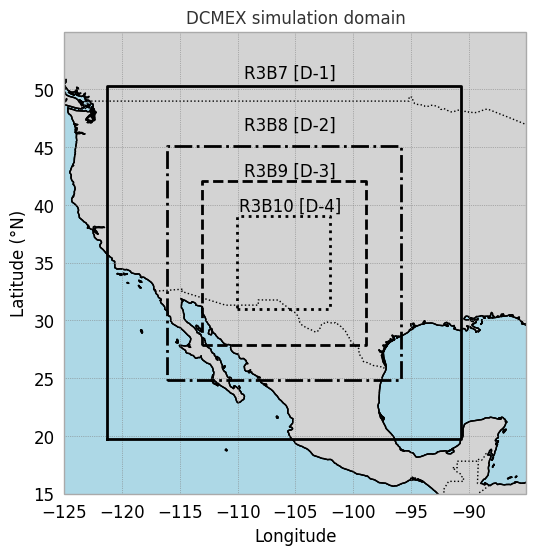

In [18]:
## ORCESTRA 3 Sept 2024 domain

lon1 = [np.rad2deg(-2.117163), np.rad2deg(-1.582617)];
lat1 = [np.rad2deg(0.3443675), np.rad2deg(0.8775246)];

lon2 = [np.rad2deg(-2.027213), np.rad2deg(-1.672835)];
lat2 = [np.rad2deg(0.4339893), np.rad2deg(0.78789)];

lon3 = [np.rad2deg(-1.973857), np.rad2deg(-1.726188)];
lat3 = [np.rad2deg(0.4871754), np.rad2deg(0.7346672)];

lon4 = [np.rad2deg(-1.920478), np.rad2deg(-1.779626)];
lat4 = [np.rad2deg(0.5404571), np.rad2deg(0.6812963)];

#lon2 = [-22., -38.];
#lat2 = [-0., 17.];

#lon3 = [-25., -35.];
#lat3 = [4, 14.];

#lon4 = [-28., -32.];
#lat4 = [7., 11.];

print(np.min(lon1), np.max(lon1))
print(np.min(lat1), np.max(lat1))

fontsize = 12

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and features for context
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')


ax.plot([lon1[0], lon1[1], lon1[1], lon1[0], lon1[0]], 
        [lat1[0], lat1[0], lat1[1], lat1[1], lat1[0]], 
        color='black', linewidth=2, linestyle='-', transform=ccrs.PlateCarree())

ax.plot([lon2[0], lon2[1], lon2[1], lon2[0], lon2[0]], 
        [lat2[0], lat2[0], lat2[1], lat2[1], lat2[0]], 
        color='black', linewidth=2, linestyle='-.', transform=ccrs.PlateCarree())

ax.plot([lon3[0], lon3[1], lon3[1], lon3[0], lon3[0]], 
        [lat3[0], lat3[0], lat3[1], lat3[1], lat3[0]], 
        color='black', linewidth=2, linestyle='--', transform=ccrs.PlateCarree())

ax.plot([lon4[0], lon4[1], lon4[1], lon4[0], lon4[0]], 
        [lat4[0], lat4[0], lat4[1], lat4[1], lat4[0]], 
        color='black', linewidth=2, linestyle=':', transform=ccrs.PlateCarree())

ax.text(-105.5, 51, "R3B7 [D-1]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-105.5, 46.5, "R3B8 [D-2]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-105.5, 42.5, "R3B9 [D-3]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')
ax.text(-105.5, 39.5, "R3B10 [D-4]", transform=ccrs.PlateCarree(), fontsize=fontsize-0, ha='center', color='k')#, fontweight='bold')

ax.set_xlim(-125., -85.)
ax.set_ylim(15., 55.)
ax.set_xticks(range(-125, -85, 5))  
ax.set_yticks(range(15, 55, 5))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_xlabel("Longitude", fontsize=fontsize)
ax.set_ylabel("Latitude (°N)", fontsize=fontsize)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')
ax.set_title('DCMEX simulation domain', fontsize=fontsize)#, fontweight='bold')

# Add oceans and continents features
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
#ax.text(-30, 26, "Atlantic Ocean", transform=ccrs.PlateCarree(), fontsize=24, fontweight='bold', ha='center', color='blue')
#ax.text(-14, 14, "Senegal", transform=ccrs.PlateCarree(), fontsize=14, fontweight='bold', ha='center', color='blue')
#ax.text(-46, -8, "Brazil", transform=ccrs.PlateCarree(), fontsize=18, fontweight='bold', ha='center', color='blue')

plt.show()

In [96]:


#ds_nosip = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/nosip/dcmex_2mom_nosip/NWP_*.nc');
ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/control/dcmex_2mom_sip/NWP_*.nc');
#ds_nohm = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/nohm/dcmex_2mom_nohm/NWP_*.nc');
#ds_norf = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/norf/dcmex_2mom_norf/NWP_*.nc');
#ds_nobr = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/nobr/dcmex_2mom_nobr/NWP_*.nc');
#ds_nosb = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/nosb/dcmex_2mom_nosb/NWP_*.nc');


In [97]:

grid_dcmex = xr.open_dataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/control/dcmex_2mom_sip/domain4_DOM04.nc');

clon_deg = np.degrees(grid_dcmex.clon)
clat_deg = np.degrees(grid_dcmex.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-107., 34.])
#print(okla_x), print(okla_y)
dx_deg = 0.4; dy_deg = 0.4
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)

window_cell = (
    (grid_dcmex.clat >= np.deg2rad(bottom_bound))
    & (grid_dcmex.clat <= np.deg2rad(top_bound))
    & (grid_dcmex.clon >= np.deg2rad(left_bound))
    & (grid_dcmex.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_dcmex.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_dcmex.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid


-109.03369797063944
-104.96560387399306
32.96608133463784
37.035429759321914
-107.4
-106.6
34.4
33.6
window_vertex_indices :: [ 3601  3603  3691 ... 31347 31348 31349]
window_edge_indices :: [11231 11232 11233 ... 91282 91283 91284]


In [98]:

new_grid_dcmex = reindex_grid(grid_dcmex, selected_indices, vars_to_renumber)

mask=np.isin(ds_4sip['ncells'], selected_indices.cell)
mask_cell = mask


In [99]:

ds_4sip['w_vel'] = -1.*ds_4sip.omega/(9.8*ds_4sip.rho)
ds_4sip['tempc'] = ds_4sip.temp-273.16;
ds_4sip['lwc_gperm3']  = ds_4sip.qc*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tqi'] = ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['tq'] = ds_4sip.qc+ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['ciwc_gperm3'] = ds_4sip.qi*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tiwc_gperm3'] = (ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh)*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['cdnc_percm3'] = ds_4sip.qnc*ds_4sip.rho*1.e-6  # perkg to percm3
ds_4sip['inc_perl'] = (ds_4sip.qni+ds_4sip.qns+ds_4sip.qng+ds_4sip.qnh)*ds_4sip.rho*1.e-3 # perkg to perl


ht_4avg = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
tempc_4avg = ds_4sip.tempc.mean(dim=('time','ncells'))

In [8]:


ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
ds_nosip['tempc'] = ds_nosip.temp-273.16;
ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tqi'] = ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['tq'] = ds_nosip.qc+ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh
ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl

ds_4sip['w_vel'] = -1.*ds_4sip.omega/(9.8*ds_4sip.rho)
ds_4sip['tempc'] = ds_4sip.temp-273.16;
ds_4sip['lwc_gperm3']  = ds_4sip.qc*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tqi'] = ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['tq'] = ds_4sip.qc+ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh
ds_4sip['ciwc_gperm3'] = ds_4sip.qi*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tiwc_gperm3'] = (ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh)*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['cdnc_percm3'] = ds_4sip.qnc*ds_4sip.rho*1.e-6  # perkg to percm3
ds_4sip['inc_perl'] = (ds_4sip.qni+ds_4sip.qns+ds_4sip.qng+ds_4sip.qnh)*ds_4sip.rho*1.e-3 # perkg to perl

ds_norf['w_vel'] = -1.*ds_norf.omega/(9.8*ds_norf.rho)
ds_norf['tempc'] = ds_norf.temp-273.16;
ds_norf['lwc_gperm3']  = ds_norf.qc*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['tqi'] = ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
ds_norf['tq'] = ds_norf.qc+ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh
ds_norf['ciwc_gperm3'] = ds_norf.qi*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['tiwc_gperm3'] = (ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh)*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['cdnc_percm3'] = ds_norf.qnc*ds_norf.rho*1.e-6  # perkg to percm3
ds_norf['inc_perl'] = (ds_norf.qni+ds_norf.qns+ds_norf.qng+ds_norf.qnh)*ds_norf.rho*1.e-3 # perkg to perl

ds_nohm['w_vel'] = -1.*ds_nohm.omega/(9.8*ds_nohm.rho)
ds_nohm['tempc'] = ds_nohm.temp-273.16;
ds_nohm['lwc_gperm3']  = ds_nohm.qc*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['tqi'] = ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
ds_nohm['tq'] = ds_nohm.qc+ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh
ds_nohm['ciwc_gperm3'] = ds_nohm.qi*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['tiwc_gperm3'] = (ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh)*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['cdnc_percm3'] = ds_nohm.qnc*ds_nohm.rho*1.e-6  # perkg to percm3
ds_nohm['inc_perl'] = (ds_nohm.qni+ds_nohm.qns+ds_nohm.qng+ds_nohm.qnh)*ds_nohm.rho*1.e-3 # perkg to perl

ds_nobr['w_vel'] = -1.*ds_nobr.omega/(9.8*ds_nobr.rho)
ds_nobr['tempc'] = ds_nobr.temp-273.16;
ds_nobr['lwc_gperm3']  = ds_nobr.qc*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['tqi'] = ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
ds_nobr['tq'] = ds_nobr.qc+ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh
ds_nobr['ciwc_gperm3'] = ds_nobr.qi*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['tiwc_gperm3'] = (ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh)*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['cdnc_percm3'] = ds_nobr.qnc*ds_nobr.rho*1.e-6  # perkg to percm3
ds_nobr['inc_perl'] = (ds_nobr.qni+ds_nobr.qns+ds_nobr.qng+ds_nobr.qnh)*ds_nobr.rho*1.e-3 # perkg to perl

ds_nosb['w_vel'] = -1.*ds_nosb.omega/(9.8*ds_nosb.rho)
ds_nosb['tempc'] = ds_nosb.temp-273.16;
ds_nosb['lwc_gperm3']  = ds_nosb.qc*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['tqi'] = ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
ds_nosb['tq'] = ds_nosb.qc+ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh
ds_nosb['ciwc_gperm3'] = ds_nosb.qi*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['tiwc_gperm3'] = (ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh)*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['cdnc_percm3'] = ds_nosb.qnc*ds_nosb.rho*1.e-6  # perkg to percm3
ds_nosb['inc_perl'] = (ds_nosb.qni+ds_nosb.qns+ds_nosb.qng+ds_nosb.qnh)*ds_nosb.rho*1.e-3 # perkg to perl


ht_4avg = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
tempc_4avg = ds_4sip.tempc.mean(dim=('time','ncells'))


NameError: name 'ds_nosip' is not defined

In [100]:

aircraft_starttime='2022-08-02T15:00:00.000000000'
aircraft_endtime='2022-08-02T21:00:00.000000000'

#ds_nosip_new = ds_nosip.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
ds_4sip_new = ds_4sip.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_norf_new = ds_norf.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nohm_new = ds_nohm.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nobr_new = ds_nobr.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
#ds_nosb_new = ds_nosb.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))


In [9]:



w_thres = 2.

###### With SIP
# lwc gperm3
filt_lwc_up = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-9) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
filt_lwc_dn = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-9) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.lwc_gperm3, np.nan)
filt_lwc_st = xr.where((ds_4sip_new.lwc_gperm3 > 1.e-9) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.lwc_gperm3, np.nan)

lwc_up_sip = filt_lwc_up.mean(dim=('time','ncells'))
lwc_dn_sip = filt_lwc_dn.mean(dim=('time','ncells'))
lwc_st_sip = filt_lwc_st.mean(dim=('time','ncells'))

tempc_sip = ds_4sip_new.tempc.mean(dim=('time','ncells'))

# iwc gperm3
filt_tiwc_up = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
filt_tiwc_dn = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
filt_tiwc_st = xr.where((ds_4sip_new.tiwc_gperm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.tiwc_gperm3, np.nan)

tiwc_up_sip = filt_tiwc_up.mean(dim=('time','ncells'))
tiwc_dn_sip = filt_tiwc_dn.mean(dim=('time','ncells'))
tiwc_st_sip = filt_tiwc_st.mean(dim=('time','ncells'))

# CDNC percm3
filt_cdnc_up = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
filt_cdnc_dn = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.cdnc_percm3, np.nan)
filt_cdnc_st = xr.where((ds_4sip_new.cdnc_percm3 > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.cdnc_percm3, np.nan)

cdnc_up_sip = filt_cdnc_up.mean(dim=('time','ncells'))
cdnc_dn_sip = filt_cdnc_dn.mean(dim=('time','ncells'))
cdnc_st_sip = filt_cdnc_st.mean(dim=('time','ncells'))


# inc gperm3
filt_inc_up = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
filt_inc_dn = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (ds_4sip_new.w_vel < -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
filt_inc_st = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)

inc_up_sip = filt_inc_up.mean(dim=('time','ncells'))
inc_dn_sip = filt_inc_dn.mean(dim=('time','ncells'))
inc_st_sip = filt_inc_st.mean(dim=('time','ncells'))


In [10]:

####================== Boxplot of ICON-LWC [4-SIP]
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
lwc_sip_up_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_sip_dn_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_sip_st_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.lwc_gperm3, np.nan)
tempc_sip = ds_4sip_new.tempc

lwc_sip_up_gperm3 = lwc_sip_up_gperm3.values.flatten()
lwc_sip_dn_gperm3 = lwc_sip_dn_gperm3.values.flatten()
lwc_sip_st_gperm3 = lwc_sip_st_gperm3.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_lwc_sip = pd.DataFrame({
    'lwc_up': lwc_sip_up_gperm3,
    'lwc_dn': lwc_sip_dn_gperm3,
    'lwc_st': lwc_sip_st_gperm3,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_lwc_sip['temp_bin'] = np.digitize(df_lwc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_lwc_sip['temp_bin'] = bin_edges[df_lwc_sip['temp_bin']]

df_lwc_up_sip = df_lwc_sip[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_sip = df_lwc_sip[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_sip = df_lwc_sip[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_sip = df_lwc_up_sip.dropna(subset=['temp_bin'])
df_lwc_dn_sip = df_lwc_dn_sip.dropna(subset=['temp_bin'])
df_lwc_st_sip = df_lwc_st_sip.dropna(subset=['temp_bin'])

lwc_sip_up_by_bin = [df_lwc_up_sip[df_lwc_up_sip['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_sip_dn_by_bin = [df_lwc_dn_sip[df_lwc_dn_sip['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_sip_st_by_bin = [df_lwc_st_sip[df_lwc_st_sip['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]


In [11]:

####================== Boxplot of ICON-CDNC [3-SIP]
w_thres = 2.
thres_q = 1.e-2
###### Without SIP
# lwc gperm3
cdnc_sip_up_percm3 = xr.where((ds_4sip_new.cdnc_percm3 > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_sip_dn_percm3 = xr.where((ds_4sip_new.cdnc_percm3 > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_sip_st_percm3 = xr.where((ds_4sip_new.cdnc_percm3 > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.cdnc_percm3, np.nan)
tempc_sip = ds_4sip_new.tempc

cdnc_sip_up_percm3 = cdnc_sip_up_percm3.values.flatten()
cdnc_sip_dn_percm3 = cdnc_sip_dn_percm3.values.flatten()
cdnc_sip_st_percm3 = cdnc_sip_st_percm3.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_cdnc_sip = pd.DataFrame({
    'cdnc_up': cdnc_sip_up_percm3,
    'cdnc_dn': cdnc_sip_dn_percm3,
    'cdnc_st': cdnc_sip_st_percm3,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_cdnc_sip['temp_bin'] = np.digitize(df_cdnc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_cdnc_sip['temp_bin'] = bin_edges[df_cdnc_sip['temp_bin']]

df_cdnc_up_sip = df_cdnc_sip[['cdnc_up', 'temp_bin']].dropna()
df_cdnc_dn_sip = df_cdnc_sip[['cdnc_dn', 'temp_bin']].dropna()
df_cdnc_st_sip = df_cdnc_sip[['cdnc_st', 'temp_bin']].dropna()

df_cdnc_up_sip = df_cdnc_up_sip.dropna(subset=['temp_bin'])
df_cdnc_dn_sip = df_cdnc_dn_sip.dropna(subset=['temp_bin'])
df_cdnc_st_sip = df_cdnc_st_sip.dropna(subset=['temp_bin'])

cdnc_sip_up_by_bin = [df_cdnc_up_sip[df_cdnc_up_sip['temp_bin'] == temp]['cdnc_up'].values for temp in bin_edges]
cdnc_sip_dn_by_bin = [df_cdnc_dn_sip[df_cdnc_dn_sip['temp_bin'] == temp]['cdnc_dn'].values for temp in bin_edges]
cdnc_sip_st_by_bin = [df_cdnc_st_sip[df_cdnc_st_sip['temp_bin'] == temp]['cdnc_st'].values for temp in bin_edges]


In [12]:

####================== Boxplot of ICON-IWC [3-SIP]
w_thres = 2.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
iwc_sip_up_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
iwc_sip_dn_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
iwc_sip_st_gperm3 = xr.where((ds_4sip_new.tqi > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
tempc_sip = ds_4sip_new.tempc

iwc_sip_up_gperm3 = iwc_sip_up_gperm3.values.flatten()
iwc_sip_dn_gperm3 = iwc_sip_dn_gperm3.values.flatten()
iwc_sip_st_gperm3 = iwc_sip_st_gperm3.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_iwc_sip = pd.DataFrame({
    'iwc_up': iwc_sip_up_gperm3,
    'iwc_dn': iwc_sip_dn_gperm3,
    'iwc_st': iwc_sip_st_gperm3,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_iwc_sip['temp_bin'] = np.digitize(df_iwc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_iwc_sip['temp_bin'] = bin_edges[df_iwc_sip['temp_bin']]

df_iwc_up_sip = df_iwc_sip[['iwc_up', 'temp_bin']].dropna()
df_iwc_dn_sip = df_iwc_sip[['iwc_dn', 'temp_bin']].dropna()
df_iwc_st_sip = df_iwc_sip[['iwc_st', 'temp_bin']].dropna()

df_iwc_up_sip = df_iwc_up_sip.dropna(subset=['temp_bin'])
df_iwc_dn_sip = df_iwc_dn_sip.dropna(subset=['temp_bin'])
df_iwc_st_sip = df_iwc_st_sip.dropna(subset=['temp_bin'])

iwc_sip_up_by_bin = [df_iwc_up_sip[df_iwc_up_sip['temp_bin'] == temp]['iwc_up'].values for temp in bin_edges]
iwc_sip_dn_by_bin = [df_iwc_dn_sip[df_iwc_dn_sip['temp_bin'] == temp]['iwc_dn'].values for temp in bin_edges]
iwc_sip_st_by_bin = [df_iwc_st_sip[df_iwc_st_sip['temp_bin'] == temp]['iwc_st'].values for temp in bin_edges]


In [13]:

####================== Boxplot of ICON-INC [3-SIP]
w_thres = 2.
thres_q = 1.e-4
###### Without SIP
# lwc gperm3
inc_sip_up_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
inc_sip_dn_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
inc_sip_st_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)

#inc_sip_up_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
#inc_sip_dn_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
#inc_sip_st_perl = xr.where((ds_4sip_new.tqi > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)
tempc_sip = ds_4sip_new.tempc

inc_sip_up_perl = inc_sip_up_perl.values.flatten()
inc_sip_dn_perl = inc_sip_dn_perl.values.flatten()
inc_sip_st_perl = inc_sip_st_perl.values.flatten()
tempc_sip = tempc_sip.values.flatten()

df_inc_sip = pd.DataFrame({
    'inc_up': inc_sip_up_perl,
    'inc_dn': inc_sip_dn_perl,
    'inc_st': inc_sip_st_perl,
    'tempc': tempc_sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_inc_sip['temp_bin'] = np.digitize(df_inc_sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_inc_sip['temp_bin'] = bin_edges[df_inc_sip['temp_bin']]

df_inc_up_sip = df_inc_sip[['inc_up', 'temp_bin']].dropna()
df_inc_dn_sip = df_inc_sip[['inc_dn', 'temp_bin']].dropna()
df_inc_st_sip = df_inc_sip[['inc_st', 'temp_bin']].dropna()

df_inc_up_sip = df_inc_up_sip.dropna(subset=['temp_bin'])
df_inc_dn_sip = df_inc_dn_sip.dropna(subset=['temp_bin'])
df_inc_st_sip = df_inc_st_sip.dropna(subset=['temp_bin'])

inc_sip_up_by_bin = [df_inc_up_sip[df_inc_up_sip['temp_bin'] == temp]['inc_up'].values for temp in bin_edges]
inc_sip_dn_by_bin = [df_inc_dn_sip[df_inc_dn_sip['temp_bin'] == temp]['inc_dn'].values for temp in bin_edges]
inc_sip_st_by_bin = [df_inc_st_sip[df_inc_st_sip['temp_bin'] == temp]['inc_st'].values for temp in bin_edges]


In [14]:


file = open('/work/bb1163/b382718/output/dcmex/observations/airborne_inp/02_INP_data_teflon.csv'); 

data_teflon_inp = pd.read_csv('/work/bb1163/b382718/output/dcmex/observations/airborne_inp/02_INP_data_teflon.csv');
data_polycar_inp = pd.read_csv('/work/bb1163/b382718/output/dcmex/observations/airborne_inp/03_INP_data_polycarbonate.csv');

#print(data_teflon_inp)
sample_tef = data_teflon_inp['Sample'];
drop_freeze_tef_temp_degC = data_teflon_inp['Droplet freezing temp'];
fract_frozen = data_teflon_inp['Fraction frozen'];
teflon_inp_perl = data_teflon_inp['INP(L-1)'];
upper_error_inp = data_teflon_inp['INP upper error bar'];
lower_error_inp = data_teflon_inp['INP lower error bar'];

sample_polycar = data_polycar_inp['Sample'];
drop_freeze_polycar_temp_degC = data_polycar_inp['Droplet freezing temp'];
fract_frozen = data_polycar_inp['Fraction frozen'];
polycar_inp_perl = data_polycar_inp['INP(L-1)'];
polycar_upper_error_inp = data_polycar_inp['INP upper error bar'];
polycar_lower_error_inp = data_polycar_inp['INP lower error bar'];


In [15]:


temp_bin = [0., -2., -4., -6., -8., -10., -12., -14., -16., -18., -20., -22., -24., -26., -28., -30., -32., -34., -36.];

mean_tef_inp_perl = []; tef_inp_med = []; tef_inp_std_dev = [];
for i in range(len(temp_bin)-1):
    mask = (drop_freeze_tef_temp_degC >= temp_bin[i+1]) & (drop_freeze_tef_temp_degC < temp_bin[i])
    mean_tef_inp_perl.append(np.mean(teflon_inp_perl[mask]))
    tef_inp_med.append(np.nanmedian(mean_tef_inp_perl))
    tef_inp_std_dev.append(np.nanstd(mean_tef_inp_perl))


# Calculate statistics
tef_inp_std_err = tef_inp_std_dev/np.sqrt(len(mean_tef_inp_perl))

mean_polycar_inp_perl = []; polycar_inp_med = []; polycar_inp_std_dev = [];
for i in range(len(temp_bin)-1):
    mask = (drop_freeze_polycar_temp_degC >= temp_bin[i+1]) & (drop_freeze_polycar_temp_degC < temp_bin[i])
    mean_polycar_inp_perl.append(np.mean(polycar_inp_perl[mask]))
    polycar_inp_med.append(np.nanmedian(mean_polycar_inp_perl))
    polycar_inp_std_dev.append(np.nanstd(mean_polycar_inp_perl))


# Calculate statistics
tef_inp_std_err = tef_inp_std_dev/np.sqrt(len(mean_tef_inp_perl))


In [17]:
import h5py

# Open the NetCDF file using h5py
with h5py.File('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core-cloud-phy_faam_20220802_v601_r0_c310.nc', 'r') as f:
    # Print all group names in the file
    print(f.visititems(lambda name, obj: print(name)))

ModuleNotFoundError: No module named 'h5py'

In [16]:
####################### Aircraft observation analysis #######################
import netCDF4

data_faam_core_cld_phy_latlon = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core-cloud-phy_faam_20220802_v602_r1_c310.nc');
data_faam_core_cld_phy = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core-cloud-phy_faam_20220802_v503_r1_c310.nc')
#print(data_faam_core.time)

time_faam_core_cld_phy = data_faam_core_cld_phy['Time'];
lon_faam_core_cld_phy = data_faam_core_cld_phy_latlon['longitude'];
lat_faam_core_cld_phy = data_faam_core_cld_phy_latlon['latitude'];
alt_faam_core_cld_phy = data_faam_core_cld_phy_latlon['altitude'];
#cdp_conc_faam_core_cld_phy = data_faam_core_cld_phy['cdp_conc'];
#print(time_faam_core)
print('')
data_faam_hvps = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/man-hvps_faam_20220802_v001_r0_c310.nc');
data_faam_cpi  = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/man-cpi_faam_20220802_v001_c310.nc');
data_faam_2ds  = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/man-2ds_faam_20220802_v001_r0_c310.nc')
data_faam_core = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core_faam_20220802_v005_r0_c310.nc');

data_faam_nevrozov = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/metoffice-nevzorov_faam_20220802_r0_c310_1hz.nc');
data_faam_core_1hz = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core_faam_20220802_v005_r0_c310_1hz.nc');


time = pd.to_datetime(data_faam_cpi['time'].values)
new_time = time.map(lambda t: t.replace(year=2022,day=2))
data_faam_cpi['time'] = new_time

time_cpi = pd.to_datetime(data_faam_cpi['time'].values)

# Set the nanoseconds part to zero (resetting microseconds/nanoseconds to 0)
new_time = time_cpi.map(lambda t: t.replace(microsecond=0, nanosecond=0))

# Update the time coordinate in the DataArray
data_faam_cpi['time'] = new_time


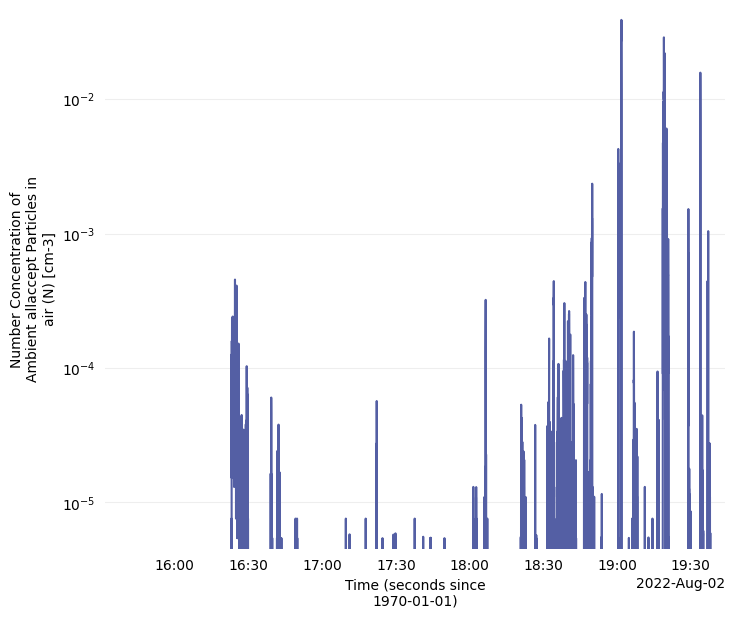

In [262]:

data_faam_hvps.total_number_concentration_of_ambient_allaccept_particles_in_air.plot()
plt.yscale('log')

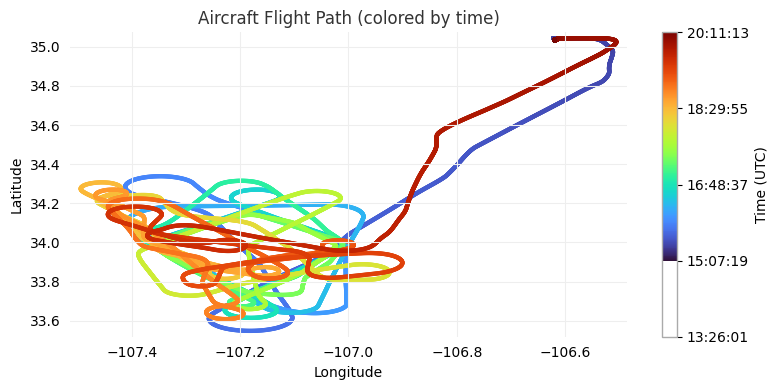

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Load data (already done in your snippet)
# data_faam_core_cld_phy_latlon = xr.open_dataset('...')
# data_faam_core_cld_phy = xr.open_dataset('...')

# Extract variables
time = pd.to_datetime(data_faam_core_cld_phy['Time'].values)  # convert to datetime if needed
lon = data_faam_core_cld_phy_latlon['longitude'].values
lat = data_faam_core_cld_phy_latlon['latitude'].values

# Plot setup
fig, ax = plt.subplots(figsize=(8, 4))

# Use scatter with time as color
sc = ax.scatter(lon, lat, c=mdates.date2num(time), cmap='turbo', s=10, edgecolor='none')

# Add a colorbar with time ticks
cbar = plt.colorbar(sc, ax=ax, orientation='vertical')
cbar.set_label('Time (UTC)')
tick_locs = np.linspace(mdates.date2num(time[0]), mdates.date2num(time[-1]), num=5)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels([pd.to_datetime(mdates.num2date(t)).strftime('%H:%M:%S') for t in tick_locs])

# Labeling
ax.set_title('Aircraft Flight Path (colored by time)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

plt.tight_layout()
plt.show()


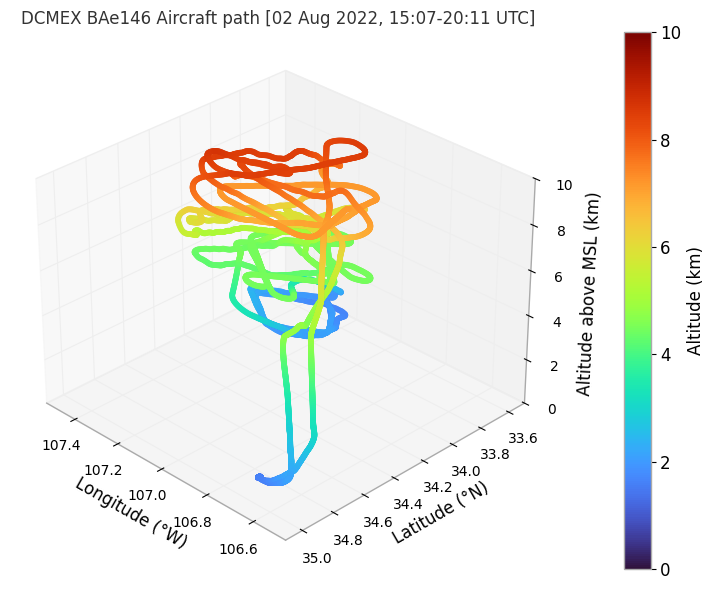

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

data_faam_core_cld_phy_latlon = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core-cloud-phy_faam_20220802_v602_r1_c310.nc');
data_faam_core_cld_phy = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core-cloud-phy_faam_20220802_v503_r1_c310.nc')
#print(data_faam_core.time)

time_faam_core_cld_phy = data_faam_core_cld_phy['Time'];
lon_faam_core_cld_phy = data_faam_core_cld_phy_latlon['longitude'];
lat_faam_core_cld_phy = data_faam_core_cld_phy_latlon['latitude'];
alt_faam_core_cld_phy = data_faam_core_cld_phy_latlon['altitude'];

# Extract and prepare data
time = pd.to_datetime(data_faam_core_cld_phy['Time'].values)
mean_lon = data_faam_core_cld_phy_latlon['longitude'].values
mean_lat = data_faam_core_cld_phy_latlon['latitude'].values
mean_alt = data_faam_core_cld_phy_latlon['altitude'].values / 1000.0  # Convert to km


fnt = 12
lnw = 3
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with altitude as color
sc = ax.scatter(-1*mean_lon, mean_lat, mean_alt, c=mean_alt, cmap='turbo', s=10, vmin=0, vmax=10)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, ticks=[0, 2, 4, 6, 8, 10], pad=0.1)
cbar.set_label('Altitude (km)', fontsize=fnt)
cbar.ax.tick_params(labelsize=fnt)

# Axis labels
#ax.set_ylim(33,35)
#ax.set_xlim(-105,-107)
ax.set_zlim(0,10)
ax.set_xlabel('Longitude (°W)', fontsize=fnt)
ax.set_ylabel('Latitude (°N)', fontsize=fnt)
ax.set_zlabel('Altitude above MSL (km)', fontsize=fnt)
ax.tick_params(axis='x', labelsize=fnt-2)
ax.tick_params(axis='y', labelsize=fnt-2)
ax.tick_params(axis='z', labelsize=fnt-2)
ax.set_title('DCMEX BAe146 Aircraft path [02 Aug 2022, 15:07-20:11 UTC]', fontsize=fnt)

# Optional: rotate view
ax.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()


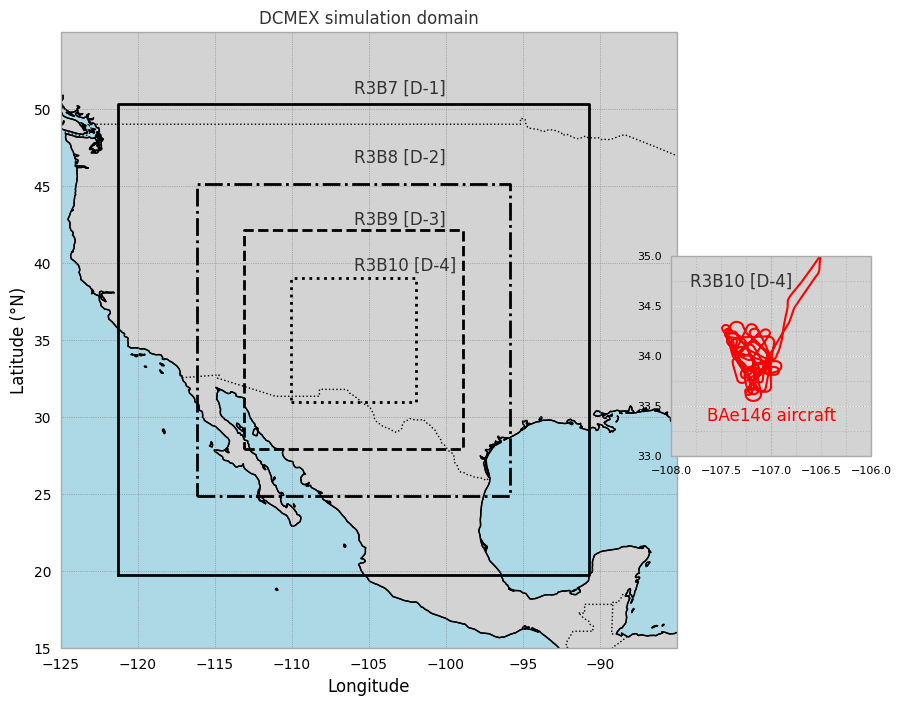

In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Define bounding boxes (in degrees)
lon1 = [np.rad2deg(-2.117163), np.rad2deg(-1.582617)];
lat1 = [np.rad2deg(0.3443675), np.rad2deg(0.8775246)];

lon2 = [np.rad2deg(-2.027213), np.rad2deg(-1.672835)];
lat2 = [np.rad2deg(0.4339893), np.rad2deg(0.78789)];

lon3 = [np.rad2deg(-1.973857), np.rad2deg(-1.726188)];
lat3 = [np.rad2deg(0.4871754), np.rad2deg(0.7346672)];

lon4 = [np.rad2deg(-1.920478), np.rad2deg(-1.779626)];
lat4 = [np.rad2deg(0.5404571), np.rad2deg(0.6812963)];

fontsize = 12
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Plot base map
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Plot bounding boxes
for lon, lat, style in zip(
    [lon1, lon2, lon3, lon4],
    [lat1, lat2, lat3, lat4],
    ['-', '-.', '--', ':']
):
    ax.plot([lon[0], lon[1], lon[1], lon[0], lon[0]],
            [lat[0], lat[0], lat[1], lat[1], lat[0]],
            color='black', linewidth=2, linestyle=style, transform=proj)


# Labels
ax.text(-106, 51, "R3B7 [D-1]", transform=proj, fontsize=fontsize)
ax.text(-106, 46.5, "R3B8 [D-2]", transform=proj, fontsize=fontsize)
ax.text(-106, 42.5, "R3B9 [D-3]", transform=proj, fontsize=fontsize)
ax.text(-106, 39.5, "R3B10 [D-4]", transform=proj, fontsize=fontsize)

# Map limits
ax.set_xlim(-125., -85.)
ax.set_ylim(15., 55.)
ax.set_xticks(range(-125, -85, 5))  
ax.set_yticks(range(15, 55, 5))
ax.set_xlabel("Longitude", fontsize=fontsize)
ax.set_ylabel("Latitude (°N)", fontsize=fontsize)
ax.set_title('DCMEX simulation domain', fontsize=fontsize)
ax.grid(True, linestyle=':', linewidth=0.5, color='grey')

# === Create inset axes === #
inset_position = [0.65, 0.35, 0.30, 0.25]  # [left, bottom, width, height] in figure coordinates
inset_ax = fig.add_axes(inset_position, projection=proj)
inset_ax.set_extent([-108, -106, 33, 35], crs=proj)
inset_ax.coastlines(resolution='50m')
inset_ax.add_feature(cfeature.LAND, facecolor='lightgray')
inset_ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
inset_ax.gridlines(draw_labels=False, linestyle=':')


# Aircraft track in inset
inset_ax.plot(lon_faam_core_cld_phy, lat_faam_core_cld_phy, 'r-', transform=proj)

inset_ax.plot([-107, -106, -106, -107, -107],
              [33, 33, 35, 35, 33],
              color='black', linewidth=1, linestyle=':', alpha=0.1, transform=proj)

inset_ax.text(-107.3, 34.75, 'R3B10 [D-4]', transform=proj, 
              fontsize=fontsize, ha='center', va='center', 
              bbox=dict(facecolor='none', edgecolor='none', alpha=0.7))

gl = inset_ax.gridlines(draw_labels=False, linestyle=':', color='grey', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
#gl.xlabel_style = {'size': 10}
#gl.ylabel_style = {'size': 10}
inset_ax.set_xticks(np.linspace(-108, -106, 5), crs=proj)
inset_ax.set_yticks(np.linspace(33, 35, 5), crs=proj)
inset_ax.tick_params(axis='both', which='major', labelsize=8)

# --- Radar marker in zoomed inset ---
inset_ax.text(-107, 33.35, 'BAe146 aircraft', transform=proj, fontsize=fontsize, ha='center', color='red')

plt.show()


In [22]:

import matplotlib.patches as mpatches

# Validating total ice number concentrations

file_cip = '/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/core-cloud-phy_faam_20220802_v602_r1_c310.nc'
ds_cip15 = xr.open_mfdataset(file_cip, group='cip_15/processed');
ds_cip100 = xr.open_mfdataset(file_cip, group='cip_100/processed');

ds_cip15['cip15_conc_bin_perl'] = ds_cip15['cip15_iwc_psd'].where(ds_cip15['cip15_iwc_psd'] != 0, np.nan)
ds_cip100['cip100_conc_bin_perl'] = ds_cip100['cip100_iwc_psd'].where(ds_cip100['cip100_iwc_psd'] != 0, np.nan)

# sum over all diameter bins
ds_cip15['tot_cip15_perl'] = ds_cip15.cip15_conc_bin_perl.sum(dim=('cip15_bin_centre'))
ds_cip100['tot_cip100_perl'] = ds_cip100.cip100_conc_bin_perl.sum(dim=('cip100_bin_centre'))

# merge cip100 and cip15
ds_cip_new = xr.merge([ds_cip15, ds_cip100])

# total cip concentrations
ds_cip_new['tot_inc_perl'] = ds_cip15['tot_cip15_perl']+ds_cip100['tot_cip100_perl']

# Need to extract temperature from core data
data_faam_core_1hz_new = data_faam_core_1hz

# ds_cip has 'time' and data_faam_core_1hz has 'Time', make it the same
data_faam_core_1hz_new = data_faam_core_1hz_new.rename({'Time': 'time'})

# CIP ice concentrations in updraft, downdraft and stratiform regions 
ds_cip_new['TAT_DI_R'] = data_faam_core_1hz_new['TAT_DI_R']
ds_cip_new['W_C'] = data_faam_core_1hz_new['W_C']
ds_cip_new['tempc'] = ds_cip_new['TAT_DI_R']-273.16

# create conditions
thres_n = 0.
filt_cip15_up_cond = (ds_cip_new.tot_cip15_perl > thres_q) & (ds_cip_new.W_C > 1.)
filt_cip15_dn_cond = (ds_cip_new.tot_cip15_perl > thres_q) & (ds_cip_new.W_C < 1.)
filt_cip15_st_cond = (ds_cip_new.tot_cip15_perl > thres_q) & (np.abs(ds_cip_new.W_C) < 1.)

filt_cip100_up_cond = (ds_cip_new.tot_cip100_perl > thres_q) & (ds_cip_new.W_C > 1.)
filt_cip100_dn_cond = (ds_cip_new.tot_cip100_perl > thres_q) & (ds_cip_new.W_C < 1.)
filt_cip100_st_cond = (ds_cip_new.tot_cip100_perl > thres_q) & (np.abs(ds_cip_new.W_C) < 1.)

filt_totcip_up_cond = (ds_cip_new.tot_inc_perl > thres_q) & (ds_cip_new.W_C > 1.)
filt_totcip_dn_cond = (ds_cip_new.tot_inc_perl > thres_q) & (ds_cip_new.W_C < -1.)
filt_totcip_st_cond = (ds_cip_new.tot_inc_perl > thres_q) & (np.abs(ds_cip_new.W_C) < 1.)

# store variables
ds_cip_new['tot_cip15_up_perl'] = xr.where(filt_cip15_up_cond, ds_cip_new.tot_cip15_perl, np.nan)
ds_cip_new['tot_cip15_dn_perl'] = xr.where(filt_cip15_dn_cond, ds_cip_new.tot_cip15_perl, np.nan)
ds_cip_new['tot_cip15_st_perl'] = xr.where(filt_cip15_st_cond, ds_cip_new.tot_cip15_perl, np.nan)

ds_cip_new['tot_cip100_up_perl'] = xr.where(filt_cip100_up_cond, ds_cip_new.tot_cip100_perl, np.nan)
ds_cip_new['tot_cip100_dn_perl'] = xr.where(filt_cip100_dn_cond, ds_cip_new.tot_cip100_perl, np.nan)
ds_cip_new['tot_cip100_st_perl'] = xr.where(filt_cip100_st_cond, ds_cip_new.tot_cip100_perl, np.nan)

ds_cip_new['tot_inc_up_perl'] = xr.where(filt_totcip_up_cond, ds_cip_new.tot_inc_perl, np.nan)
ds_cip_new['tot_inc_dn_perl'] = xr.where(filt_totcip_dn_cond, ds_cip_new.tot_inc_perl, np.nan)
ds_cip_new['tot_inc_st_perl'] = xr.where(filt_totcip_st_cond, ds_cip_new.tot_inc_perl, np.nan)

# Define temperature bins
#temp_cip_bin = np.array([0., -3., -6., -9., -12., -15., -18., -21., -24., -27., -30.])
temp_cip_bin = np.arange(-25, 10, 5)
temp_cip_bin = np.sort(temp_cip_bin)

tempc_values = ds_cip_new['tempc'].values
nan_mask = np.isnan(tempc_values)

valid_tempc_values = tempc_values[~nan_mask]

# which temperature bin each 'ds_cip_new.tempc' value belongs to?
temp_bins_indices = np.digitize(valid_tempc_values, bins=np.append(temp_cip_bin, np.inf)) - 1
temp_bins_indices = np.clip(temp_bins_indices, 0, len(temp_cip_bin) - 1)

# assign temp_bin to temp_bin_labels
temp_bin_labels = temp_cip_bin[temp_bins_indices]
temp_bin_labels_full = np.full_like(tempc_values, np.nan)
temp_bin_labels_full[~nan_mask] = temp_bin_labels

time_coord = ds_cip_new['tempc'].coords['time']
ds_cip_new['temp_cip_bin'] = xr.DataArray(temp_bin_labels_full, coords={'time': time_coord}, dims=['time'])

#df_up_cip = ds_cip_new[['tot_inc_up_perl', 'temp_cip_bin']].to_dataframe().dropna()
#df_dn_cip = ds_cip_new[['tot_inc_dn_perl', 'temp_cip_bin']].to_dataframe().dropna()
#df_st_cip = ds_cip_new[['tot_inc_st_perl', 'temp_cip_bin']].to_dataframe().dropna()

df_up_cip = ds_cip_new[['tot_cip100_up_perl', 'temp_cip_bin']].to_dataframe().dropna()
df_dn_cip = ds_cip_new[['tot_cip100_dn_perl', 'temp_cip_bin']].to_dataframe().dropna()
df_st_cip = ds_cip_new[['tot_cip100_st_perl', 'temp_cip_bin']].to_dataframe().dropna()

df_up_cip = df_up_cip.dropna(subset=['temp_cip_bin'])
df_dn_cip = df_dn_cip.dropna(subset=['temp_cip_bin'])
df_st_cip = df_st_cip.dropna(subset=['temp_cip_bin'])

# Sort the data by bin
#inc_cip_up_by_bin = [df_up_cip[df_up_cip['temp_cip_bin'] == temp]['tot_inc_up_perl'].values for temp in temp_cip_bin]
#inc_cip_dn_by_bin = [df_dn_cip[df_dn_cip['temp_cip_bin'] == temp]['tot_inc_dn_perl'].values for temp in temp_cip_bin]
#inc_cip_st_by_bin = [df_st_cip[df_st_cip['temp_cip_bin'] == temp]['tot_inc_st_perl'].values for temp in temp_cip_bin]

inc_cip_up_by_bin = [df_up_cip[df_up_cip['temp_cip_bin'] == temp]['tot_cip100_up_perl'].values for temp in temp_cip_bin]
inc_cip_dn_by_bin = [df_dn_cip[df_dn_cip['temp_cip_bin'] == temp]['tot_cip100_dn_perl'].values for temp in temp_cip_bin]
inc_cip_st_by_bin = [df_st_cip[df_st_cip['temp_cip_bin'] == temp]['tot_cip100_st_perl'].values for temp in temp_cip_bin]


In [23]:

count_per_bin = df_up_cip.groupby('temp_cip_bin')['tot_cip100_up_perl'].count()

# Print the result
print(count_per_bin)

temp_cip_bin
-25.0    14
-20.0     9
-15.0     1
-10.0    24
-5.0      2
Name: tot_cip100_up_perl, dtype: int64


In [24]:

# for the operation below, see the ncdump -h mas-2ds_faam_20220802*.nc and emails by Blyth and Finney

twods = xr.Dataset({"time": ("time", pd.date_range("1970-01-01", periods=14604, freq="S"))})
attrs = {"description": "Adjusted time values", "source": "Generated by script"}

ts = xr.Dataset({"time": ("time", twods['time'].values + pd.Timedelta(1659454542.,unit='s'), attrs)})
twods['time'] = ts['time']

ds_2ds  = xr.open_mfdataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/man-2ds_faam_20220802_v001_r0_c310.nc', group='ch1')
ds_2ds['time'] = ts['time']

# Total ice concentrations
ds_2ds['tot_inc_perl'] = ds_2ds.total_number_concentration_of_ambient_MI_particles_in_air + ds_2ds.total_number_concentration_of_ambient_HI_particles_in_air


time_2ds = pd.to_datetime(ds_2ds['time'].values)
time_core = pd.to_datetime(data_faam_core_1hz_new['time'].values)

common_times = time_2ds[time_2ds.isin(time_core)]

# Now select data_faam_cpi where time is in common_times
ds_core_1hz_new = data_faam_core_1hz_new.sel(time=common_times)
ds_2ds_new = ds_2ds.sel(time=common_times)

#ds_2ds_new = xr.merge([ds_faam_1hz_2ds, ds_2ds])
ds_2ds_new['TAT_DI_R'] = ds_core_1hz_new['TAT_DI_R']
ds_2ds_new['W_C'] = ds_core_1hz_new['W_C']
ds_2ds_new['TAS'] = ds_core_1hz_new['TAS']
ds_2ds_new['tempc'] = ds_2ds_new['TAT_DI_R']-273.16

# As per Alan Blyth and Finney, UniLeeds (see emails)
ds_2ds_new['tot_inc_perl'] = ds_2ds_new['tot_inc_perl']*60./ds_2ds_new.TAS 

# Profiles for the updrafts, downdrafts and stratiform regions
filt_tot2ds_up_cond = (ds_2ds_new.tot_inc_perl > 0.) & (ds_2ds_new.W_C > 1.)
filt_tot2ds_dn_cond = (ds_2ds_new.tot_inc_perl > 0.) & (ds_2ds_new.W_C < -1.)
filt_tot2ds_st_cond = (ds_2ds_new.tot_inc_perl > 0.) & (np.abs(ds_2ds_new.W_C) < 1.)

# store variables
ds_2ds_new['tot_inc_up_perl'] = xr.where(filt_tot2ds_up_cond, ds_2ds_new.tot_inc_perl, np.nan)
ds_2ds_new['tot_inc_dn_perl'] = xr.where(filt_tot2ds_dn_cond, ds_2ds_new.tot_inc_perl, np.nan)
ds_2ds_new['tot_inc_st_perl'] = xr.where(filt_tot2ds_st_cond, ds_2ds_new.tot_inc_perl, np.nan)

# Define temperature bins
#temp_2ds_bin = np.array([0., -3., -6., -9., -12., -15., -18., -21., -24., -27., -30.])
temp_2ds_bin = np.arange(-25, 10, 5)
temp_2ds_bin = np.sort(temp_2ds_bin)

tempc_values = ds_2ds_new['tempc'].values
nan_mask = np.isnan(tempc_values)

valid_tempc_values = tempc_values[~nan_mask]

# which temperature bin each 'ds_cip_new.tempc' value belongs to?
temp_bins_indices = np.digitize(valid_tempc_values, bins=np.append(temp_2ds_bin, np.inf)) - 1
temp_bins_indices = np.clip(temp_bins_indices, 0, len(temp_2ds_bin) - 1)

# assign temp_bin to temp_bin_labels
temp_bin_labels = temp_2ds_bin[temp_bins_indices]
temp_bin_labels_full = np.full_like(tempc_values, np.nan)
temp_bin_labels_full[~nan_mask] = temp_bin_labels

time_coord = ds_2ds_new['tempc'].coords['time']
ds_2ds_new['temp_2ds_bin'] = xr.DataArray(temp_bin_labels_full, coords={'time': time_coord}, dims=['time'])

df_up_2ds = ds_2ds_new[['tot_inc_up_perl', 'temp_2ds_bin']].to_dataframe().dropna()
df_dn_2ds = ds_2ds_new[['tot_inc_dn_perl', 'temp_2ds_bin']].to_dataframe().dropna()
df_st_2ds = ds_2ds_new[['tot_inc_st_perl', 'temp_2ds_bin']].to_dataframe().dropna()

df_up_2ds = df_up_2ds.dropna(subset=['temp_2ds_bin'])
df_dn_2ds = df_dn_2ds.dropna(subset=['temp_2ds_bin'])
df_st_2ds = df_st_2ds.dropna(subset=['temp_2ds_bin'])

# Sort the data by bin
inc_2ds_up_by_bin = [df_up_2ds[df_up_2ds['temp_2ds_bin'] == temp]['tot_inc_up_perl'].values for temp in temp_2ds_bin]
inc_2ds_dn_by_bin = [df_dn_2ds[df_dn_2ds['temp_2ds_bin'] == temp]['tot_inc_dn_perl'].values for temp in temp_2ds_bin]
inc_2ds_st_by_bin = [df_st_2ds[df_st_2ds['temp_2ds_bin'] == temp]['tot_inc_st_perl'].values for temp in temp_2ds_bin]


In [25]:

filt_inc_up_perl = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (ds_4sip_new.w_vel > 1.), ds_4sip_new.inc_perl, np.nan)
filt_inc_dn_perl = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (ds_4sip_new.w_vel < -1.), ds_4sip_new.inc_perl, np.nan)
filt_inc_st_perl = xr.where((ds_4sip_new.inc_perl > 1.e-6) & (np.abs(ds_4sip_new.w_vel) < 1.), ds_4sip_new.inc_perl, np.nan)

tinc_up_2mom = filt_inc_up_perl.mean(dim=('time','ncells'))
tinc_dn_2mom = filt_inc_dn_perl.mean(dim=('time','ncells'))
tinc_st_2mom = filt_inc_st_perl.mean(dim=('time','ncells'))

tempc_2mom = ds_4sip_new.tempc.mean(dim=('time','ncells'))


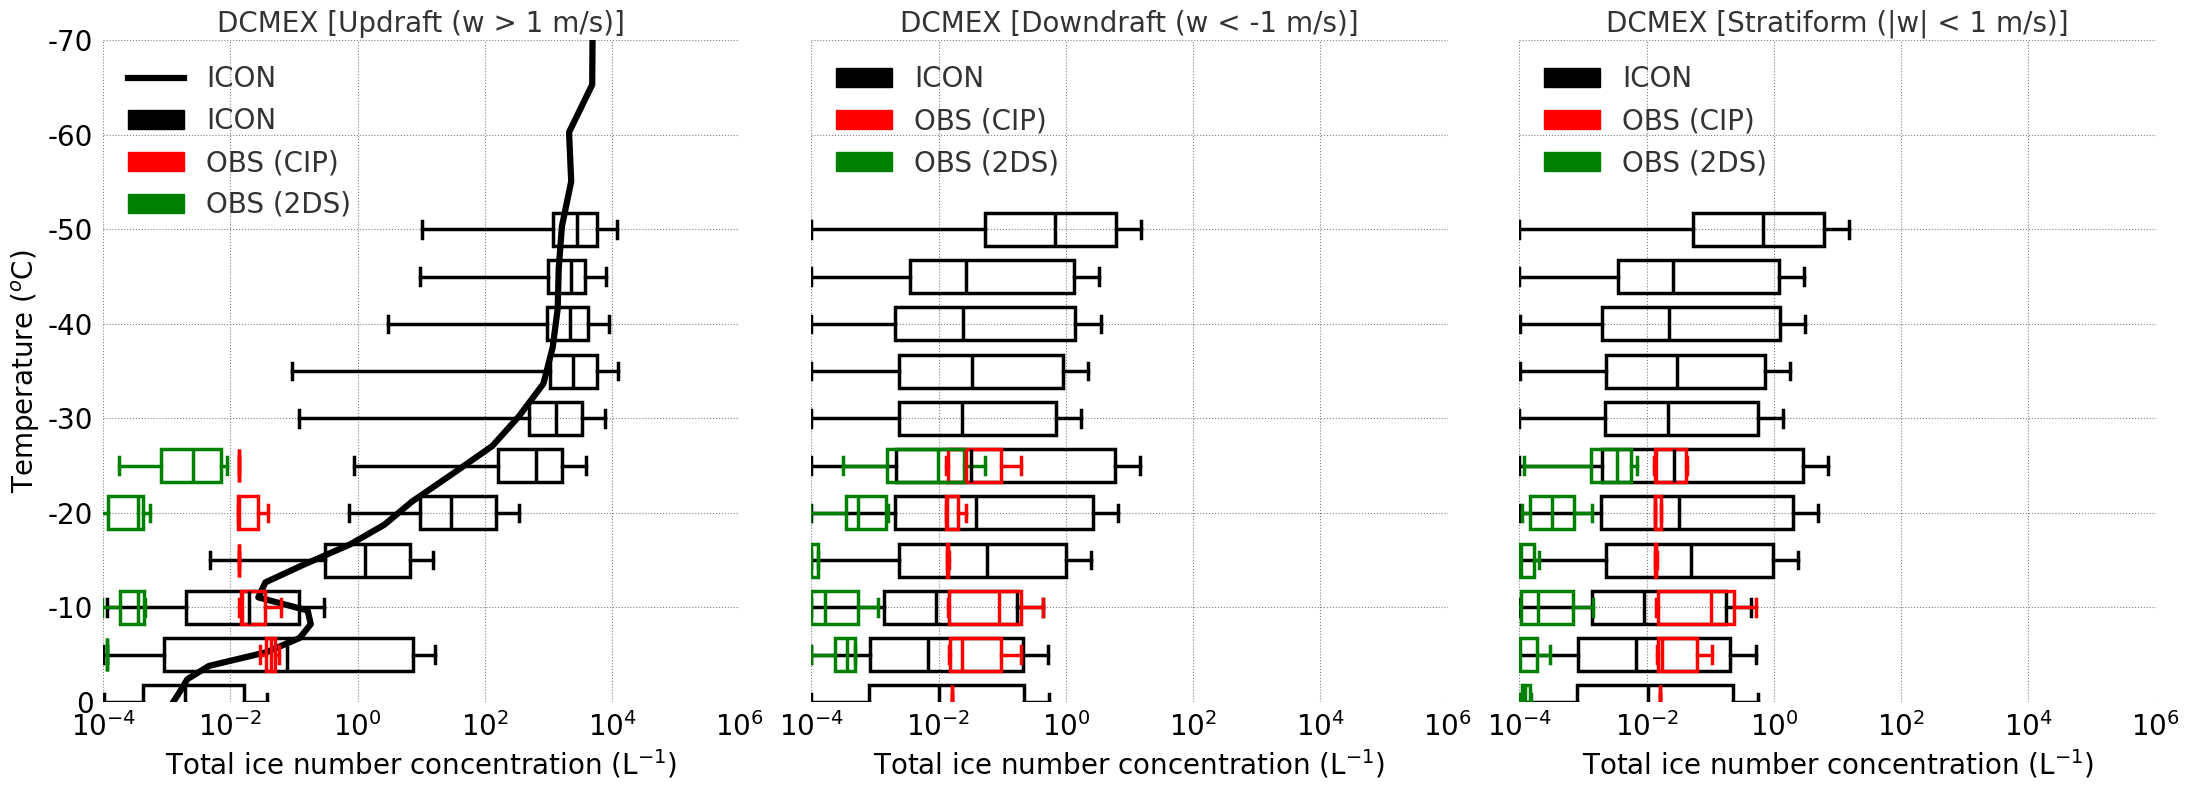

In [26]:

## ============== ICON
w_thres = 1.
thres_q = 1.e-4
###### Without SIP
# lwc gperm3
inc_sip_up_perl = xr.where((ds_4sip_new.inc_perl > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
avg_inc_sip_up_perl = inc_sip_up_perl.median(dim=('time','ncells'))
avg_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

## ================

fontsize = 20;
linewidth = 2.5;
width=3.5;
alpha1=1;
alpha2=1.;

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['DCMEX [Updraft (w > 1 m/s)]', 'DCMEX [Downdraft (w < -1 m/s)]', 'DCMEX [Stratiform (|w| < 1 m/s)]']

for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(tinc_up_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        ax.plot(avg_inc_sip_up_perl, avg_tempc, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(inc_cip_up_by_bin, positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(inc_2ds_up_by_bin, positions=temp_2ds_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(tinc_dn_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(inc_cip_dn_by_bin, positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(inc_2ds_dn_by_bin, positions=temp_2ds_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)
        
    elif i == 2:
        #ax.plot(tinc_st_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(inc_cip_st_by_bin, positions=temp_cip_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
        ax.boxplot(inc_2ds_st_by_bin, positions=temp_2ds_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='green', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='green', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='green', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='green', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-4, 1.e6)
    ax.set_xticklabels([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6], fontsize=fontsize)
    ax.set_ylim(0, -70)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=alpha1)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (CIP)')
    obs_patch3 = mpatches.Patch(color='green', label='OBS (2DS)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2, obs_patch3], frameon=False, loc='upper left', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -10, -20, -30, -40, -50, -60, -70])
axes[0].set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60', '-70'], fontsize=fontsize)
#axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40])
#axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40'], fontsize=fontsize)

plt.tight_layout()
plt.show()


In [27]:

time_nev = pd.to_datetime(data_faam_nevrozov['Time'].values)
time_core = pd.to_datetime(data_faam_core_1hz['Time'].values)

common_times = time_nev[time_nev.isin(time_core)]

# Now select data_faam_cpi where time is in common_times
#ds_core_1hz_new = data_faam_core_1hz_new.sel(time=common_times)

ds_faam_core_new = data_faam_core_1hz.sel(Time=common_times)
ds_nev_new = data_faam_nevrozov.sel(Time=common_times)

ds_nev_new = xr.merge([ds_faam_core_new, ds_nev_new])

ds_nev_new['tempc'] = ds_nev_new['TAT_DI_R']-273.16


filt_lwc_nev_up_cond = (ds_nev_new.LWC1 > 1.e-6) & (ds_nev_new.W_C > 1.)
filt_lwc_nev_dn_cond = (ds_nev_new.LWC1 > 1.e-6) & (ds_nev_new.W_C < -1.)
filt_lwc_nev_st_cond = (ds_nev_new.LWC1 > 1.e-6) & (np.abs(ds_nev_new.W_C) < 1.)

filt_iwc_nev_up_cond = (ds_nev_new.IWC1 > 1.e-6) & (ds_nev_new.W_C > 1.)
filt_iwc_nev_dn_cond = (ds_nev_new.IWC1 > 1.e-6) & (ds_nev_new.W_C < -1.)
filt_iwc_nev_st_cond = (ds_nev_new.IWC1 > 1.e-6) & (np.abs(ds_nev_new.W_C) < 1.)

# store variables
ds_nev_new['lwc_up_gperm3'] = xr.where(filt_lwc_nev_up_cond, ds_nev_new.LWC1, np.nan)
ds_nev_new['lwc_dn_gperm3'] = xr.where(filt_lwc_nev_dn_cond, ds_nev_new.LWC1, np.nan)
ds_nev_new['lwc_st_gperm3'] = xr.where(filt_lwc_nev_st_cond, ds_nev_new.LWC1, np.nan)

ds_nev_new['iwc_up_gperm3'] = xr.where(filt_iwc_nev_up_cond, ds_nev_new.IWC1, np.nan)
ds_nev_new['iwc_dn_gperm3'] = xr.where(filt_iwc_nev_dn_cond, ds_nev_new.IWC1, np.nan)
ds_nev_new['iwc_st_gperm3'] = xr.where(filt_iwc_nev_st_cond, ds_nev_new.IWC1, np.nan)

# Define temperature bins
#temp_nev_bin = np.array([30., 27., 24., 21., 18., 15., 12., 9., 6., 3., 0., -3., -6., -9., -12., -15., -18., -21., -24., -27., -30.])

temp_nev_bin = np.arange(-30, 30, 5)
temp_nev_bin = np.sort(temp_nev_bin)

tempc_values = ds_nev_new['tempc'].values
nan_mask = np.isnan(tempc_values)

valid_tempc_values = tempc_values[~nan_mask]

# which temperature bin each 'ds_cip_new.tempc' value belongs to?
temp_bins_indices = np.digitize(valid_tempc_values, bins=np.append(temp_nev_bin, np.inf)) - 1
temp_bins_indices = np.clip(temp_bins_indices, 0, len(temp_nev_bin) - 1)

# assign temp_bin to temp_bin_labels
temp_bin_labels = temp_nev_bin[temp_bins_indices]
temp_bin_labels_full = np.full_like(tempc_values, np.nan)
temp_bin_labels_full[~nan_mask] = temp_bin_labels

time_coord = ds_nev_new['tempc'].coords['Time']
ds_nev_new['temp_nev_bin'] = xr.DataArray(temp_bin_labels_full, coords={'Time': time_coord}, dims=['Time'])

df_up_lwc_nev = ds_nev_new[['lwc_up_gperm3', 'temp_nev_bin']].to_dataframe().dropna()
df_dn_lwc_nev = ds_nev_new[['lwc_dn_gperm3', 'temp_nev_bin']].to_dataframe().dropna()
df_st_lwc_nev = ds_nev_new[['lwc_st_gperm3', 'temp_nev_bin']].to_dataframe().dropna()

df_up_iwc_nev = ds_nev_new[['iwc_up_gperm3', 'temp_nev_bin']].to_dataframe().dropna()
df_dn_iwc_nev = ds_nev_new[['iwc_dn_gperm3', 'temp_nev_bin']].to_dataframe().dropna()
df_st_iwc_nev = ds_nev_new[['iwc_st_gperm3', 'temp_nev_bin']].to_dataframe().dropna()

df_up_lwc_nev = df_up_lwc_nev.dropna(subset=['temp_nev_bin'])
df_dn_lwc_nev = df_dn_lwc_nev.dropna(subset=['temp_nev_bin'])
df_st_lwc_nev = df_st_lwc_nev.dropna(subset=['temp_nev_bin'])

df_up_iwc_nev = df_up_iwc_nev.dropna(subset=['temp_nev_bin'])
df_dn_iwc_nev = df_dn_iwc_nev.dropna(subset=['temp_nev_bin'])
df_st_iwc_nev = df_st_iwc_nev.dropna(subset=['temp_nev_bin'])

# Sort the data by bin
lwc_nev_up_by_bin = [df_up_lwc_nev[df_up_lwc_nev['temp_nev_bin'] == temp]['lwc_up_gperm3'].values for temp in temp_nev_bin]
lwc_nev_dn_by_bin = [df_dn_lwc_nev[df_dn_lwc_nev['temp_nev_bin'] == temp]['lwc_dn_gperm3'].values for temp in temp_nev_bin]
lwc_nev_st_by_bin = [df_st_lwc_nev[df_st_lwc_nev['temp_nev_bin'] == temp]['lwc_st_gperm3'].values for temp in temp_nev_bin]

iwc_nev_up_by_bin = [df_up_iwc_nev[df_up_iwc_nev['temp_nev_bin'] == temp]['iwc_up_gperm3'].values for temp in temp_nev_bin]
iwc_nev_dn_by_bin = [df_dn_iwc_nev[df_dn_iwc_nev['temp_nev_bin'] == temp]['iwc_dn_gperm3'].values for temp in temp_nev_bin]
iwc_nev_st_by_bin = [df_st_iwc_nev[df_st_iwc_nev['temp_nev_bin'] == temp]['iwc_st_gperm3'].values for temp in temp_nev_bin]


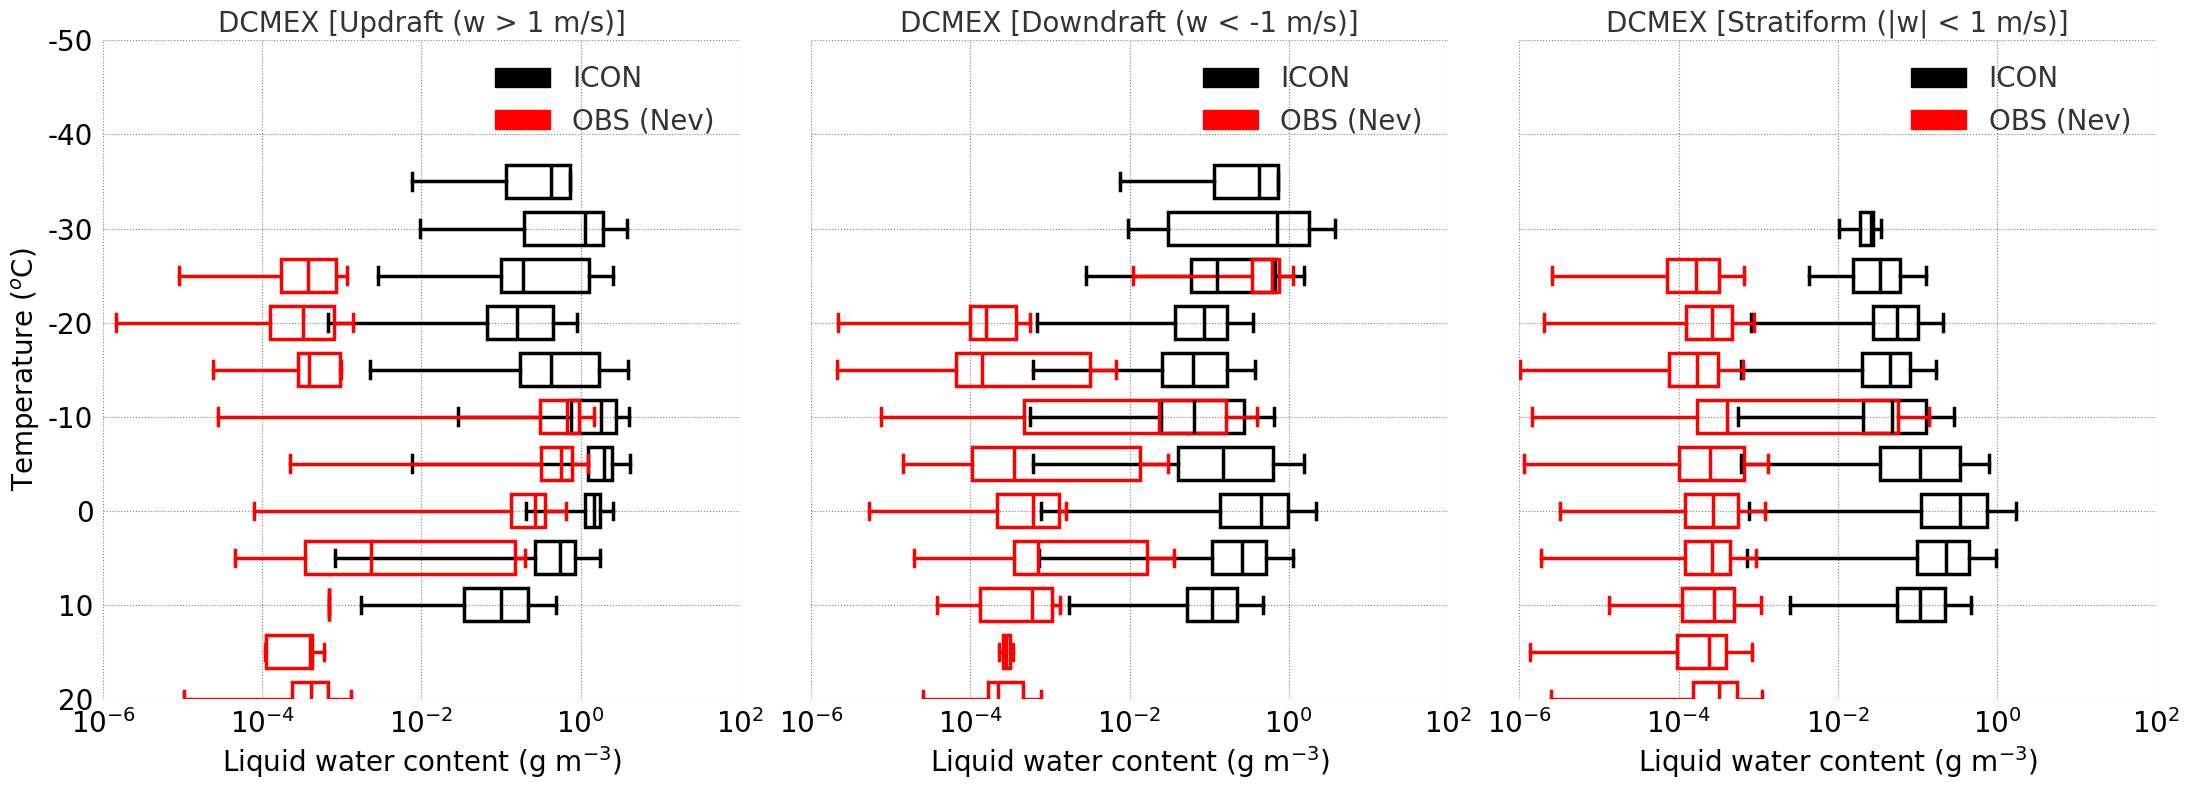

In [28]:


fontsize = 20;
linewidth = 2.5;
width=3.5;
alpha=1;
alpha1=1;
alpha2=1.;

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['DCMEX [Updraft (w > 1 m/s)]', 'DCMEX [Downdraft (w < -1 m/s)]', 'DCMEX [Stratiform (|w| < 1 m/s)]']

for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(lwc_up_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(lwc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),  
                   medianprops=dict(color='black', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),  
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(lwc_nev_up_by_bin, positions=temp_nev_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(lwc_dn_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(lwc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),  
                   medianprops=dict(color='black', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),  
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(lwc_nev_dn_by_bin, positions=temp_nev_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 2:
        #ax.plot(lwc_st_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(lwc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),  
                   medianprops=dict(color='black', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),  
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(lwc_nev_st_by_bin, positions=temp_nev_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-6, 1.e2)
    ax.set_xticklabels([1.e-6, 1.e-4, 1.e-2, 1.e0, 1.e2], fontsize=fontsize)
    ax.set_ylim(20, -50)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Liquid water content (g m$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=alpha)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (Nev)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='upper right', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([20, 10, 0, -10, -20, -30, -40, -50])
axes[0].set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40', '-50'], fontsize=fontsize)
#axes[0].set_yticks([20, 10, 0, -10, -20, -30, -40])
#axes[0].set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40'], fontsize=fontsize)

plt.tight_layout()
plt.show()


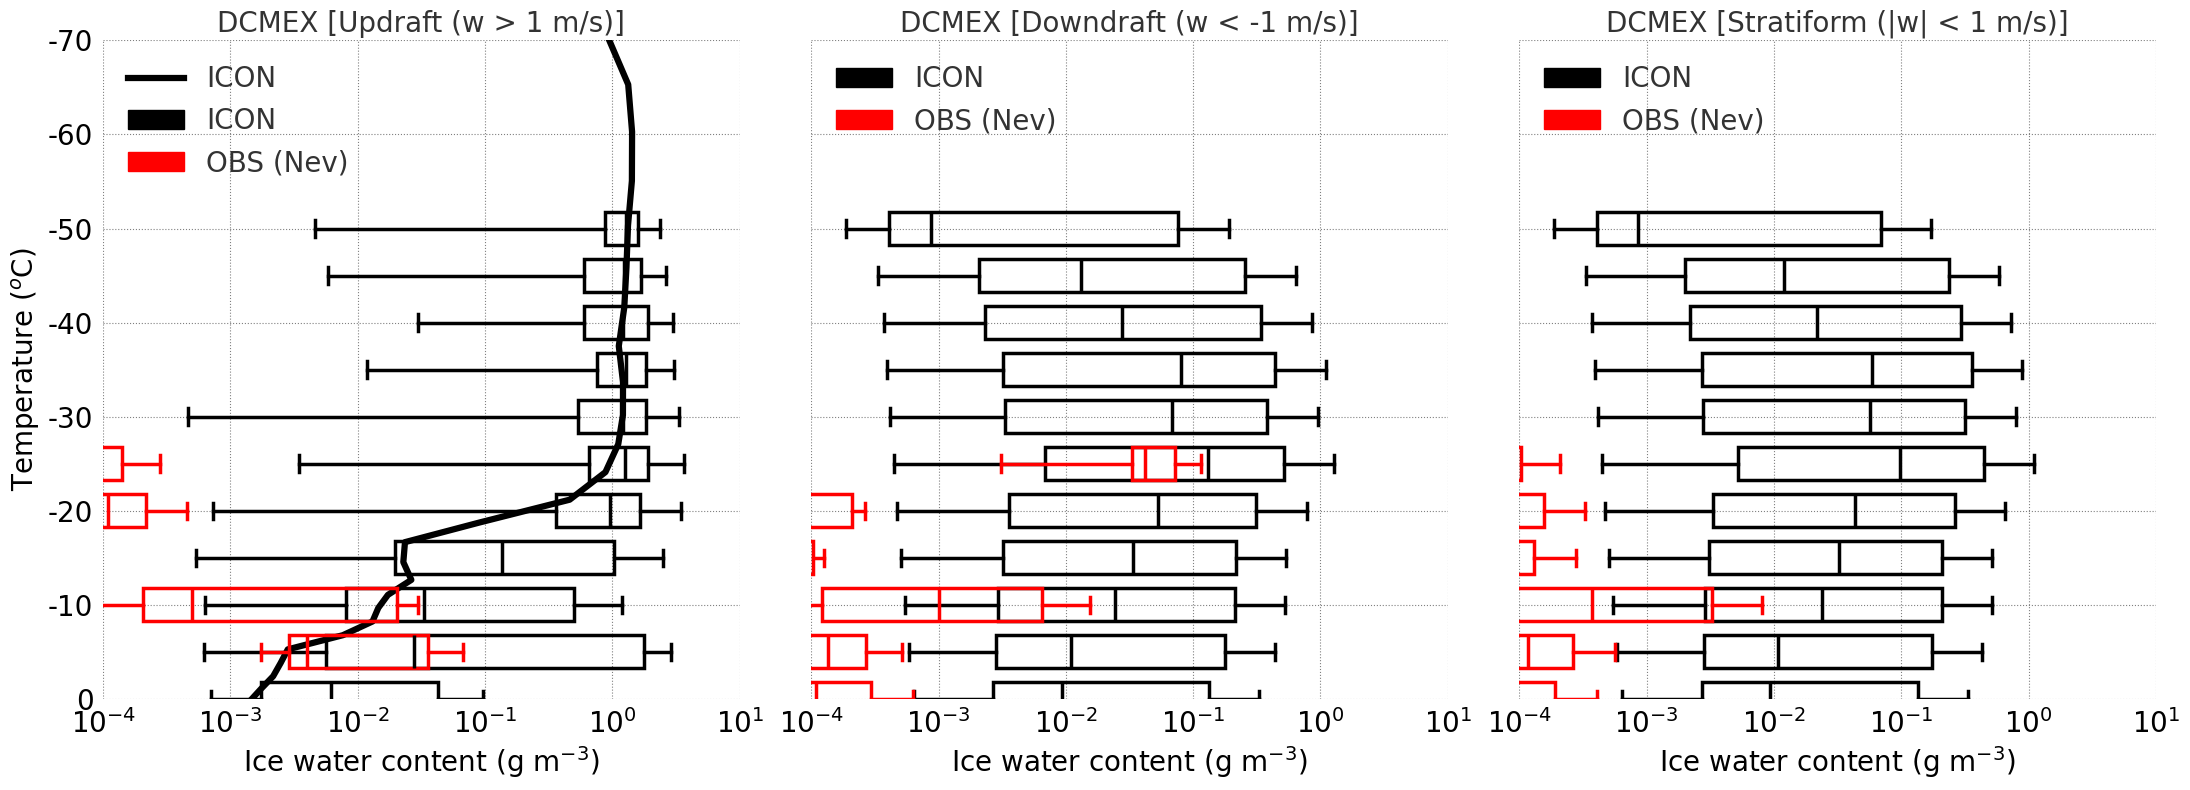

In [29]:


## ============== ICON
w_thres = 2.
thres_q = 1.e-4
###### Without SIP
# lwc gperm3
iwc_sip_up_gperm3 = xr.where((ds_4sip_new.tiwc_gperm3 > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.tiwc_gperm3, np.nan)
avg_iwc_sip_up_gperm3 = iwc_sip_up_gperm3.median(dim=('time','ncells'))
avg_tempc = ds_4sip_new.tempc.mean(dim=('time','ncells')) 

fontsize = 20;
linewidth = 2.5;
width=3.5;
alpha=1;
alpha1=1;
alpha2=1.;

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['DCMEX [Updraft (w > 1 m/s)]', 'DCMEX [Downdraft (w < -1 m/s)]', 'DCMEX [Stratiform (|w| < 1 m/s)]']

for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(tiwc_up_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.plot(avg_iwc_sip_up_gperm3, avg_tempc, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(iwc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),  
                   medianprops=dict(color='black', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),  
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(iwc_nev_up_by_bin, positions=temp_nev_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(tiwc_dn_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(iwc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),  
                   medianprops=dict(color='black', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),  
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(iwc_nev_dn_by_bin, positions=temp_nev_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 2:
        #ax.plot(tiwc_st_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(iwc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),  
                   medianprops=dict(color='black', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),  
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(iwc_nev_st_by_bin, positions=temp_nev_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-4, 1.e1)
    ax.set_xticklabels([1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
    ax.set_ylim(0, -70)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Ice water content (g m$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=alpha)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    
    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (Nev)')
    
    #obs_patch = mpatches.Patch(color='lightgrey', label='OBS (CIP)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='upper left', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -10, -20, -30, -40, -50, -60, -70])
axes[0].set_yticklabels(['0', '-10', '-20', '-30', '-40', '-50', '-60', '-70'], fontsize=fontsize)
#axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40])
#axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40'], fontsize=fontsize)

plt.tight_layout()
plt.show()


In [30]:
ds_faam_cdp_phy = data_faam_core_cld_phy

ds_faam_cdp_phy['CDP_TSPM'] = ds_faam_cdp_phy['CDP_TSPM'].dt.floor('s')
ds_faam_cdp_phy['cdnc_percm3'] = ds_faam_cdp_phy['CDP_CONC'].rename({'CDP_TSPM': 'Time'})



ds_faam_cdp_phy['TAT_DI_R'] = data_faam_core_1hz['TAT_DI_R']
ds_faam_cdp_phy['W_C'] = data_faam_core_1hz['W_C']
ds_faam_cdp_phy['tempc'] = data_faam_core_1hz.TAT_DI_R-273.16

filt_cdnc_cdp_up_cond = (ds_faam_cdp_phy.cdnc_percm3 > 1.e-1) & (ds_faam_cdp_phy.W_C > 1.)
filt_cdnc_cdp_dn_cond = (ds_faam_cdp_phy.cdnc_percm3 > 1.e-1) & (ds_faam_cdp_phy.W_C < -1.) & (ds_faam_cdp_phy.W_C > -20.)
filt_cdnc_cdp_st_cond = (ds_faam_cdp_phy.cdnc_percm3 > 1.e-1) & (np.abs(ds_faam_cdp_phy.W_C) < 1.)

# store variables
ds_faam_cdp_phy['cdnc_up_percm3'] = xr.where(filt_cdnc_cdp_up_cond, ds_faam_cdp_phy.cdnc_percm3, np.nan)
ds_faam_cdp_phy['cdnc_dn_percm3'] = xr.where(filt_cdnc_cdp_dn_cond, ds_faam_cdp_phy.cdnc_percm3, np.nan)
ds_faam_cdp_phy['cdnc_st_percm3'] = xr.where(filt_cdnc_cdp_st_cond, ds_faam_cdp_phy.cdnc_percm3, np.nan)

print(ds_faam_cdp_phy.Time)
# Define temperature bins
#temp_cdp_bin = np.array([30., 27., 24., 21., 18., 15., 12., 9., 6., 3., 0., -3., -6., -9., -12., -15., -18., -21., -24., -27., -30.])
temp_cdp_bin = np.arange(-30, 30, 5)
temp_cdp_bin = np.sort(temp_cdp_bin)

tempc_values = ds_faam_cdp_phy['tempc'].values
nan_mask = np.isnan(tempc_values)

valid_tempc_values = tempc_values[~nan_mask]

# which temperature bin each 'ds_cip_new.tempc' value belongs to?
temp_bins_indices = np.digitize(valid_tempc_values, bins=np.append(temp_cdp_bin, np.inf)) - 1
temp_bins_indices = np.clip(temp_bins_indices, 0, len(temp_cdp_bin) - 1)

# assign temp_bin to temp_bin_labels
temp_bin_labels = temp_cdp_bin[temp_bins_indices]
temp_bin_labels_full = np.full_like(tempc_values, np.nan)
temp_bin_labels_full[~nan_mask] = temp_bin_labels

time_coord = ds_faam_cdp_phy['tempc'].coords['Time']
ds_faam_cdp_phy['temp_cdp_bin'] = xr.DataArray(temp_bin_labels_full, coords={'Time': time_coord}, dims=['Time'])

df_up_cdnc_cdp = ds_faam_cdp_phy[['cdnc_up_percm3', 'temp_cdp_bin']].to_dataframe().dropna()
df_dn_cdnc_cdp = ds_faam_cdp_phy[['cdnc_dn_percm3', 'temp_cdp_bin']].to_dataframe().dropna()
df_st_cdnc_cdp = ds_faam_cdp_phy[['cdnc_st_percm3', 'temp_cdp_bin']].to_dataframe().dropna()

df_up_cdnc_cdp = df_up_cdnc_cdp.dropna(subset=['temp_cdp_bin'])
df_dn_cdnc_cdp = df_dn_cdnc_cdp.dropna(subset=['temp_cdp_bin'])
df_st_cdnc_cdp = df_st_cdnc_cdp.dropna(subset=['temp_cdp_bin'])

# Sort the data by bin
cdnc_cdp_up_by_bin = [df_up_cdnc_cdp[df_up_cdnc_cdp['temp_cdp_bin'] == temp]['cdnc_up_percm3'].values for temp in temp_cdp_bin]
cdnc_cdp_dn_by_bin = [df_dn_cdnc_cdp[df_dn_cdnc_cdp['temp_cdp_bin'] == temp]['cdnc_dn_percm3'].values for temp in temp_cdp_bin]
cdnc_cdp_st_by_bin = [df_st_cdnc_cdp[df_st_cdnc_cdp['temp_cdp_bin'] == temp]['cdnc_st_percm3'].values for temp in temp_cdp_bin]

<xarray.DataArray 'Time' (Time: 24313)> Size: 195kB
array(['2022-08-02T13:26:01.000000000', '2022-08-02T13:26:02.000000000',
       '2022-08-02T13:26:03.000000000', ..., '2022-08-02T20:11:11.000000000',
       '2022-08-02T20:11:12.000000000', '2022-08-02T20:11:13.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 195kB 2022-08-02T13:26:01 ... 2022-08-02T2...
    LAT_GIN  (Time) float32 97kB nan nan nan nan nan nan ... nan nan nan nan nan
    LON_GIN  (Time) float32 97kB nan nan nan nan nan nan ... nan nan nan nan nan


In [64]:

count_per_bin = df_dn_cdnc_cdp.groupby('temp_cdp_bin')['cdnc_dn_percm3'].count()

# Print the result
print(count_per_bin)

temp_cdp_bin
-25.0     15
-20.0      4
-15.0     11
-10.0    100
-5.0      29
 0.0      11
 5.0      11
 25.0      1
Name: cdnc_dn_percm3, dtype: int64


In [54]:
cdnc_cdp_up_by_bin

[array([], dtype=float32),
 array([ 17.673454, 188.7421  , 229.58992 , 223.40279 , 225.60966 ,
        193.85179 ,  23.555042, 198.55286 , 156.56262 , 250.3639  ,
        319.46222 , 236.77777 ], dtype=float32),
 array([223.63568 , 344.02252 , 309.91284 , 333.49594 ,   8.526205,
          7.305161,  35.616215], dtype=float32),
 array([89.2221], dtype=float32),
 array([3.1609970e+02, 3.5369424e+02, 3.7659854e+02, 3.0562411e+02,
        1.3953676e+02, 1.6575494e+02, 3.4159576e+02, 3.4017664e+02,
        3.8600522e+02, 3.0533502e+02, 3.3596759e+02, 3.8777054e+02,
        4.0761740e+02, 4.4633865e+02, 1.8640492e+02, 3.3132431e+02,
        3.0247968e+02, 2.9575266e+02, 3.3347641e+02, 3.4846054e+02,
        3.4469397e+02, 3.8600635e+02, 3.6384708e+02, 2.9010995e+02,
        4.0358563e+02, 4.4104773e+02, 3.6308011e+02, 9.2452820e+01,
        3.4484317e+02, 4.1826501e+02, 2.1463078e+02, 2.2790584e+02,
        2.7791806e+02, 3.5004907e+02, 3.8307510e+02, 3.2844186e+02,
        3.2856757e+02, 2.

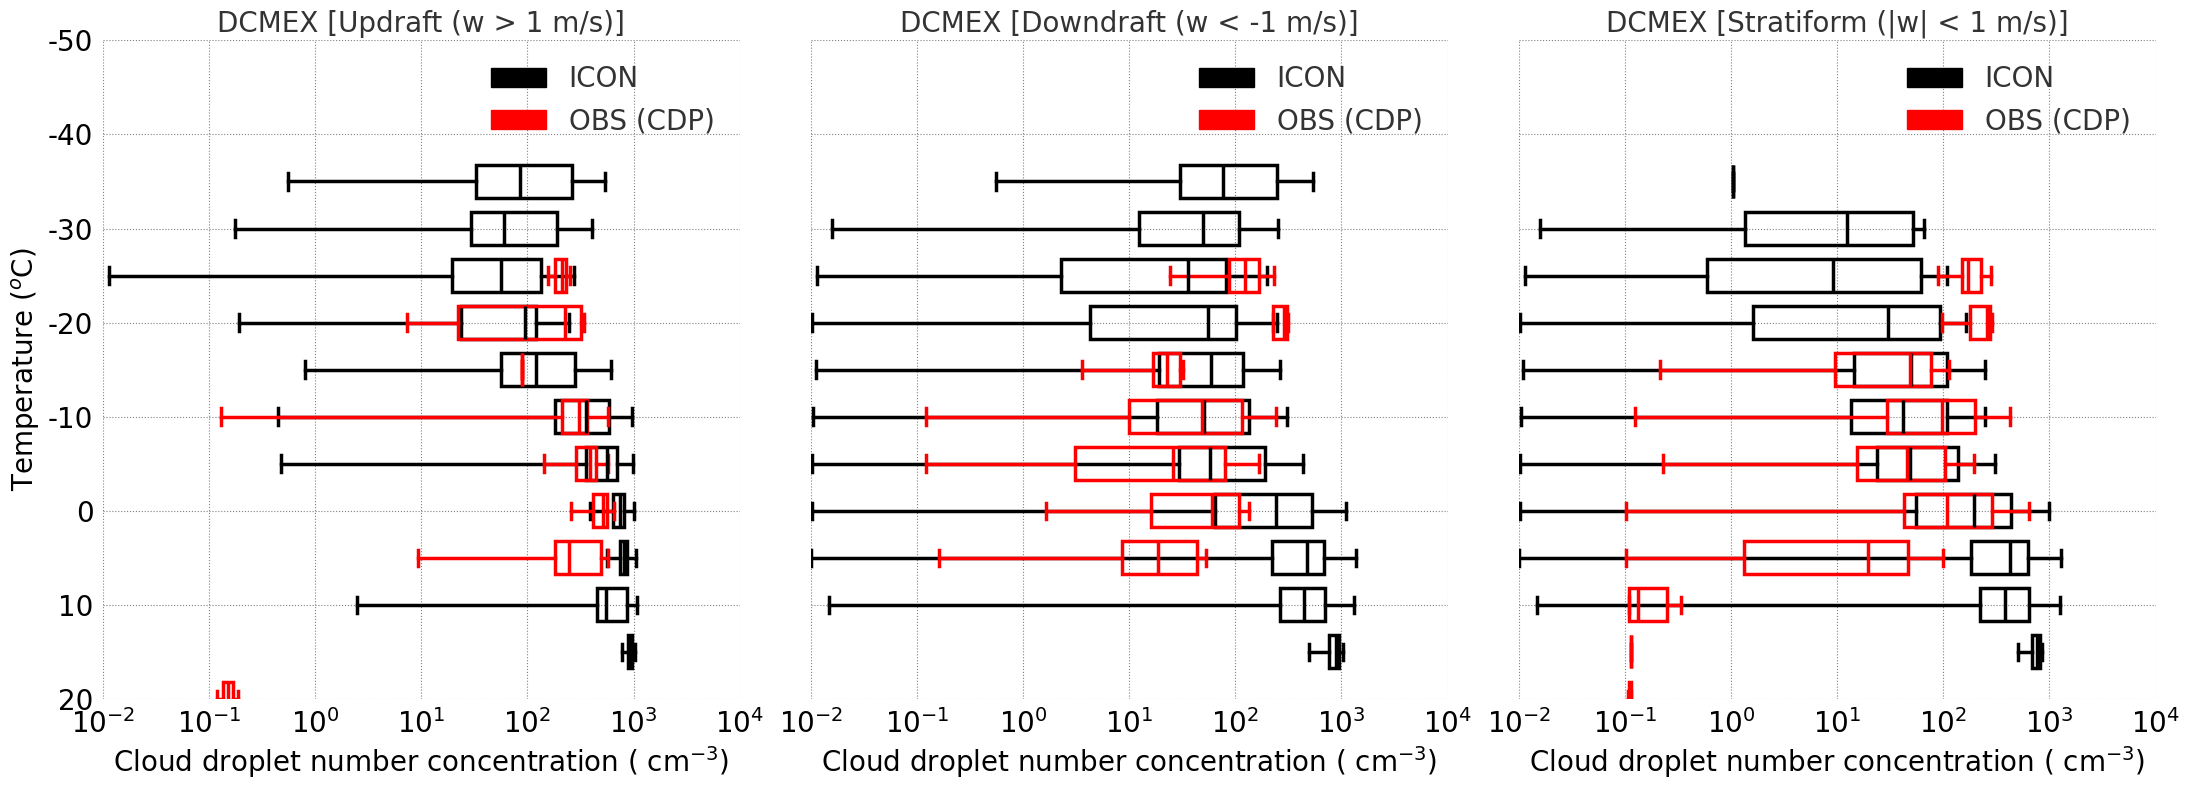

In [31]:


fontsize = 20;
linewidth = 3;
width=2;
alpha=1;

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['DCMEX [Updraft (w > 1 m/s)]', 'DCMEX [Downdraft (w < -1 m/s)]', 'DCMEX [Stratiform (|w| < 1 m/s)]']

linewidth = 2.5;
width=3.5;
alpha1=1;
alpha2=1.;
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(cdnc_up_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(cdnc_sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(cdnc_cdp_up_by_bin, positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(cdnc_dn_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(cdnc_sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(cdnc_cdp_dn_by_bin, positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 2:
        #ax.plot(cdnc_st_2mom, tempc_2mom, 'k-', linewidth=linewidth+2, label='ICON')
        
        ax.boxplot(cdnc_sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
                   medianprops=dict(color='black', linewidth=linewidth),
                   whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
                   showfliers=False)
        
        ax.boxplot(cdnc_cdp_st_by_bin, positions=temp_cdp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-2, 1.e4)
    ax.set_xticklabels([1.e-2, 1.e-1, 1.e0, 1.e1, 1.e2, 1.e3, 1.e4], fontsize=fontsize)
    ax.set_ylim(20, -50)
    #ax.set_yticklabels([20, 10, 0, -10, -20, -30, -40], fontsize=fontsize)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Cloud droplet number concentration ( cm$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (CDP)')

    ax.legend(handles=handles + [obs_patch1, obs_patch2], frameon=False, loc='upper right', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([20, 10, 0, -10, -20, -30, -40, -50])
axes[0].set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40', '-50'], fontsize=fontsize)
#axes[0].set_yticks([20, 10, 0, -10, -20, -30, -40])
#axes[0].set_yticklabels(['20', '10', '0', '-10', '-20', '-30', '-40'], fontsize=fontsize)

plt.tight_layout()
plt.show()


# Radar

##### Before we go into details of the S-Pol radar data from STEPS, lets understand a few basic things 
##### about the radar scan

##### Radar scans rotate 360°, and the azimuth tells you where the radar is “looking.”

##### Interpreting scan direction from the radar Azimuth angle
#####     Azimuth(°) ==  Direction
#####         0      ==   North
#####        90      ==   East
#####       180      ==   South
#####       270      ==   West              

##### When we say "eastward distance", we mean: “How far something is to the east or west of the radar?”
##### If a target (like a cloud or storm) is directly east of the radar → its eastward distance is positive
##### If it’s directly west of the radar → its eastward distance is negative

##### ===========================================================================================
##### Azimuth tells the direction the radar is scanning.
##### Eastward distance means “how far east or west something is from the radar.”
##### If azimuth is in the east half (0–180°), targets are generally eastward (positive).
##### If azimuth is in the west half (180–360°), targets are generally westward (negative).
##### ===========================================================================================


(0.0, 140.0)

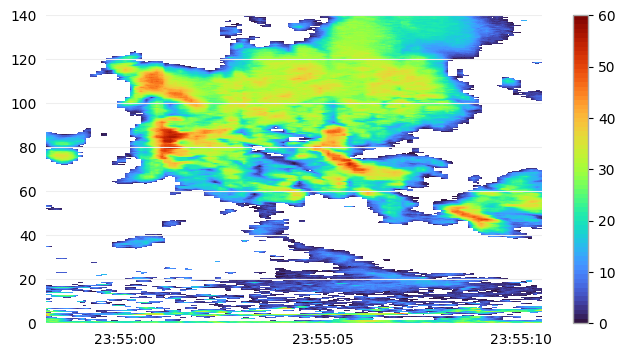

In [27]:

file_path='/work/bk1415/b382718/output/steps/observations/radar_data/deepa405903/20000619_0620'
ds_spol_steps = xr.open_mfdataset(f'{file_path}/cfrad.20000619_235458.000_to_20000619_235510.533_SPOL_PPI.nc');
ds_spol_steps

ds_spol_steps['refl'] = xr.where(ds_spol_steps.DZ > 0., ds_spol_steps.DZ, np.nan)

lev = np.linspace(0,60,70)
plt.figure(figsize=(8, 4))
cont = plt.contourf(ds_spol_steps.time, 1.e-3*ds_spol_steps.range, ds_spol_steps.refl.T, levels=lev, cmap='turbo')
plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60])
plt.ylim(0, 140)

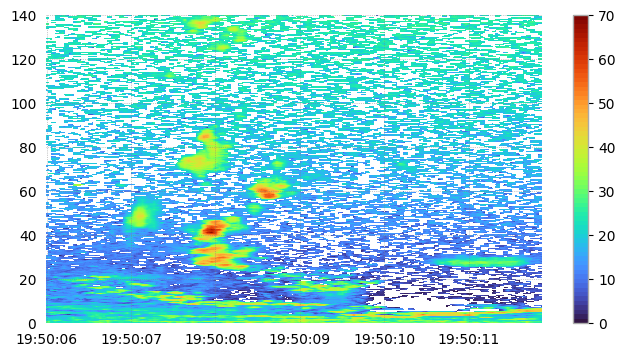

In [32]:

file_path='/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802'
ds_spol1 = xr.open_mfdataset(f'{file_path}/cfrad.20220802_195005.995_to_20220802_195011.870_SR1_v10_s00_el1.60_PPI.nc');

ds_spol1
ds_spol1['refl'] = xr.where(ds_spol1.DBZ > 0., ds_spol1.DBZ, np.nan)

lev = np.linspace(0,70,70)


plt.figure(figsize=(8, 4))
deg_faint_errbar = 0.6
lnwdth1=3
lnwdth2=3
fontsize=18
cont = plt.contourf(ds_spol1.time, 1.e-3*ds_spol1.range, ds_spol1.refl.T, levels=lev, cmap='turbo')
plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60, 70])
plt.ylim(0, 140)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('k')
plt.gca().spines['left'].set_color('k')
plt.show()

<xarray.Dataset> Size: 7MB
Dimensions:                           (frequency: 1, sweep: 1, r_calib: 1,
                                       time: 130, range: 1001)
Coordinates:
  * frequency                         (frequency) float32 4B 5.593e+09
  * time                              (time) datetime64[ns] 1kB 2022-08-02T20...
  * range                             (range) float32 4kB 0.0 150.0 ... 1.5e+05
Dimensions without coordinates: sweep, r_calib
Data variables: (12/134)
    volume_number                     float64 8B ...
    platform_type                     |S32 32B ...
    primary_axis                      |S32 32B ...
    status_xml                        |S1 1B ...
    instrument_type                   |S32 32B ...
    radar_antenna_gain_h              float32 4B ...
    ...                                ...
    RHOHV                             (time, range) float32 521kB ...
    DM                                (time, range) float32 521kB ...
    VRo                    

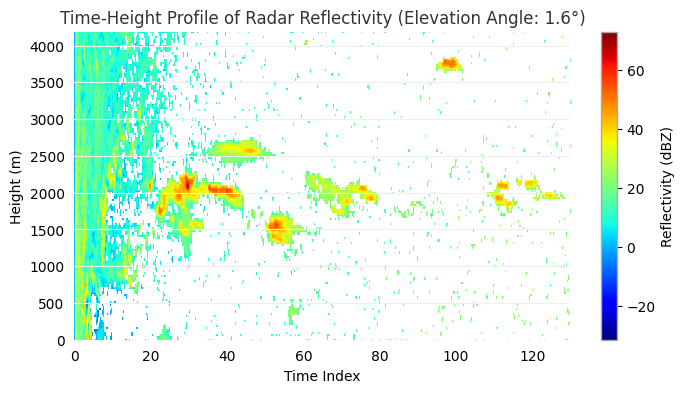

In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Function to convert range to height based on the radar's elevation angle
def range_to_height(range_data, elevation_angle_deg):
    """
    Convert radar range to height (z) given the elevation angle.
    :param range_data: 1D array of range values (meters)
    :param elevation_angle_deg: Elevation angle in degrees
    :return: 1D array of height values (meters)
    """
    # Convert elevation angle to radians
    elevation_angle_rad = np.radians(elevation_angle_deg)
    
    # Compute height using radar geometry
    # z = range * sin(elevation_angle)
    height_data = range_data * np.sin(elevation_angle_rad)
    return height_data

# Load the radar data from NetCDF (adjust path as needed)
file_path = '/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/cfrad.20220802_200005.252_to_20220802_200011.131_SR1_v14_s00_el1.60_PPI.nc'
dataset = xr.open_dataset(file_path)

# Check the dataset to confirm we have the correct structure
print(dataset)

# Extract reflectivity (DBZ), range, and time data from the dataset
reflectivity = dataset['DBZ']  # Adjust if the variable name is different
range_data = dataset['range']  # The radar range data (distance from radar)
time_data = dataset['time']  # The time data (timestamps)

# Define the elevation angle (from your file, it appears to be 1.6 degrees)
elevation_angle = 1.60  # Adjust as needed for each file (1.6°, 2.4°, etc.)

# Convert range data to height using the given elevation angle
height_data = range_to_height(range_data, elevation_angle)

# Create a time-height profile by extracting reflectivity at each time step and mapping to height
time_height_profile = []

# Loop through each time step and extract reflectivity values
for time_idx in range(reflectivity.shape[0]):  # 130 time steps
    reflectivity_time = reflectivity[time_idx, :]  # Extract reflectivity at this time
    time_height_profile.append(reflectivity_time)

# Convert the time-height profile to a numpy array
time_height_profile = np.array(time_height_profile)

# Plot the time-height profile
plt.figure(figsize=(8, 4))
plt.imshow(time_height_profile, aspect='auto', cmap='jet', extent=[0, len(time_data), 0, np.max(height_data)])
plt.colorbar(label='Reflectivity (dBZ)')
plt.ylabel('Height (m)')
plt.xlabel('Time Index')
plt.title(f'Time-Height Profile of Radar Reflectivity (Elevation Angle: {elevation_angle}°)')
plt.show()


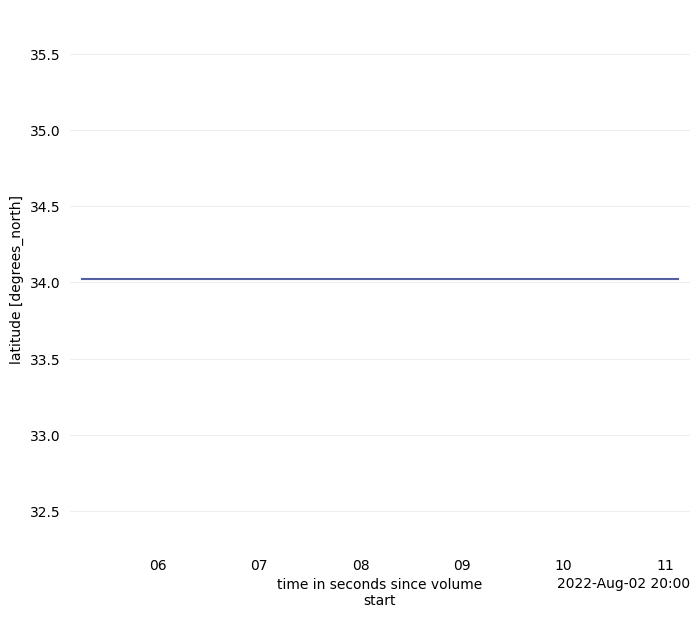

In [88]:
dataset.latitude.plot()

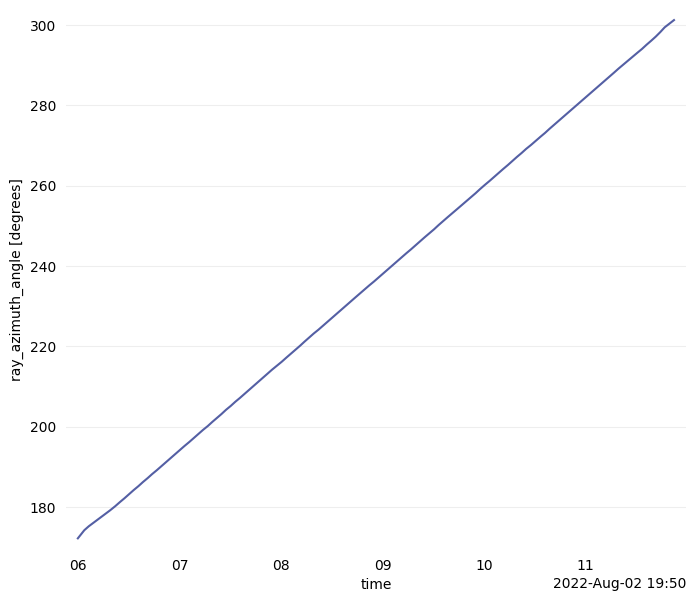

In [118]:
ds_ppi.azimuth.plot()

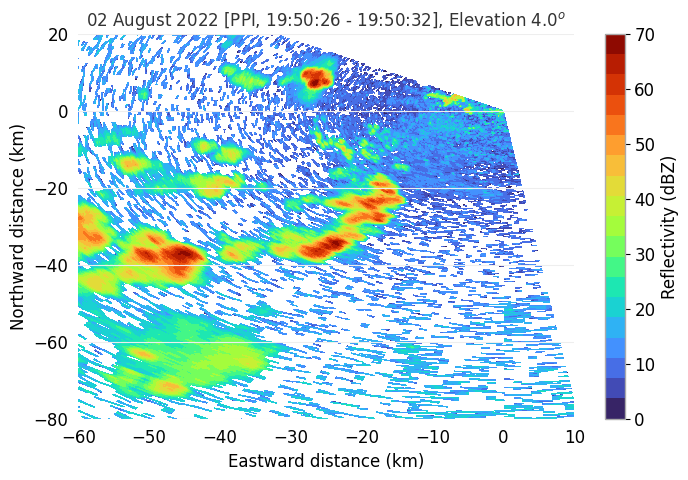

In [34]:

file_path='/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802'

#ds_ppi = xr.open_mfdataset(f'{file_path}/cfrad.20220802_195005.995_to_20220802_195011.870_SR1_v10_s00_el1.60_PPI.nc');
ds_ppi = xr.open_mfdataset(f'{file_path}/cfrad.20220802_195026.400_to_20220802_195032.295_SR1_v10_s03_el4.00_PPI.nc');

ds_ppi['refl'] = xr.where(ds_ppi.DBZ > 0., ds_ppi.DBZ, np.nan)

# Get azimuth and range, convert to radians and km
azimuth = ds_ppi['azimuth'].values             # shape: (azimuth,)
range_gate = ds_ppi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
eastward_dist = r_grid * np.sin(theta_grid)            # eastward (km)
northward_dist = r_grid * np.cos(theta_grid)            # northward (km)


lev = np.linspace(0, 70, 20)
cont_lev = range(0, 51, 10)
fontsize=12


# Plotting
plt.figure(figsize=(8, 5))

cont = plt.contourf(eastward_dist, northward_dist, ds_ppi.refl, cmap='turbo', levels=lev, shading='auto')

#contour=plt.contour(eastward_dist, northward_dist, ds_ppi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.xlim(-60, 10)
plt.ylim(-80, 20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Northward distance (km)', fontsize=fontsize)
plt.title('02 August 2022 [PPI, 19:50:26 - 19:50:32], Elevation 4.0$^{o}$', fontsize=fontsize)
cb=plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

#plt.tight_layout()
plt.show()

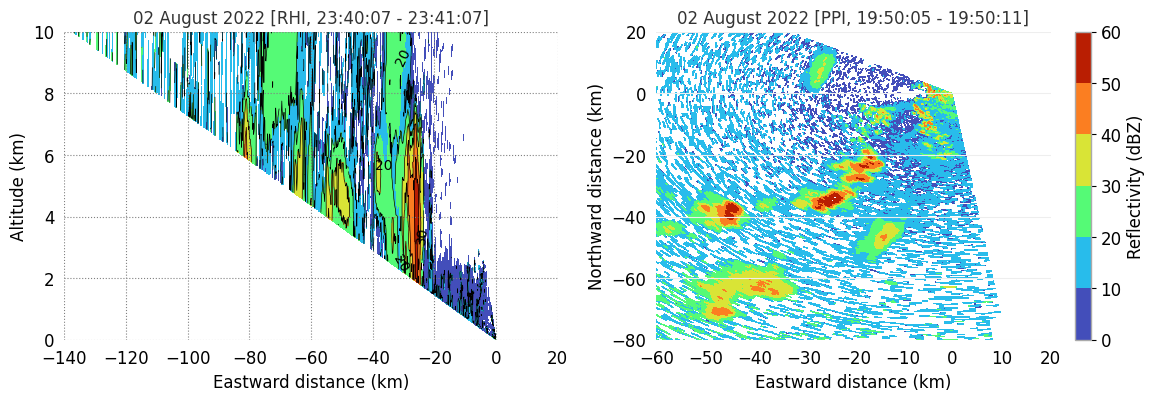

In [35]:


file_path='/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802'

ds_ppi = xr.open_mfdataset(f'{file_path}/cfrad.20220802_195005.995_to_20220802_195011.870_SR1_v10_s00_el1.60_PPI.nc');

ds_ppi['refl'] = xr.where(ds_ppi.DBZ > 0., ds_ppi.DBZ, np.nan)


ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20220802_195806.088_to_20220802_195811.678_SR1_v13_s00_az224.00_RHI.nc');

ds_rhi['refl'] = xr.where(ds_rhi.DBZ > 0., ds_rhi.DBZ, np.nan)
 
## Need to convert radar data from polar to cartesian coordinate to plot properly 
## To plot eastward-northward plot, convert data into eastward & northward distance from ds.range and ds.azimuth 

# Get azimuth and range, convert to radians and km
azimuth = ds_ppi['azimuth'].values             # shape: (azimuth,)
range_gate = ds_ppi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(azimuth)                # radians

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
eastward_dist = r_grid * np.sin(theta_grid)            # eastward (km)
northward_dist = r_grid * np.cos(theta_grid)            # northward (km)

## To plot range-height plot, convert data into horizontal distance and height from ds.range and ds.elevation 

# Get elevation and range, convert to radians and km

theta_elev = ds_rhi['elevation'].values             # shape: (elevation,)
range_gate = ds_rhi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(theta_elev)                # radians


# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)

lev = np.linspace(0, 60, 7)
cont_lev = range(0, 51, 10)
fontsize=12


# Plotting
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
cont = plt.contourf(-1*hor_dist, height, ds_rhi.refl, cmap='turbo', levels=lev, shading='auto')

contour=plt.contour(-1*hor_dist, height, ds_rhi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)
plt.xlim(-140, 20)
plt.ylim(0, 10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('02 August 2022 [RHI, 23:40:07 - 23:41:07]', fontsize=fontsize)
#cb=plt.colorbar(cont, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Reflectivity (dBZ)')
#cb.ax.tick_params(labelsize=fontsize)
#cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

plt.subplot(1,2,2)
cont = plt.contourf(eastward_dist, northward_dist, ds_ppi.refl, cmap='turbo', levels=lev, shading='auto')

#contour=plt.contour(eastward_dist, northward_dist, ds_ppi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.xlim(-60, 20)
plt.ylim(-80, 20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Northward distance (km)', fontsize=fontsize)
plt.title('02 August 2022 [PPI, 19:50:05 - 19:50:11]', fontsize=fontsize)
cb=plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50, 60], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

#plt.tight_layout()
plt.show()

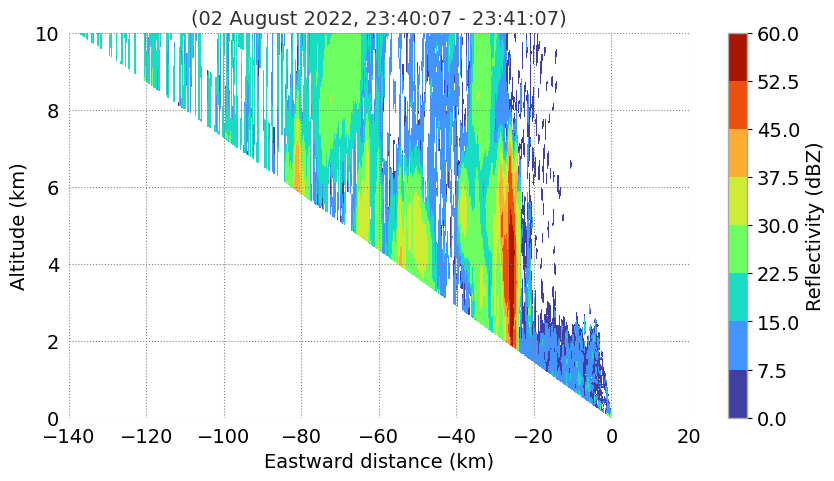

In [36]:


file_path='/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802'
ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20220802_195806.088_to_20220802_195811.678_SR1_v13_s00_az224.00_RHI.nc');
#ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20000619_234058.267_to_20000619_234107.667_SPOL_RHI.nc');

ds_rhi['refl'] = xr.where(ds_rhi.DBZ > 0., ds_rhi.DBZ, np.nan)
 
## Need to convert radar data from polar to cartesian coordinate to plot properly 

## To plot range-height plot, convert data into horizontal distance and height from ds.range and ds.elevation 

# Get azimuth and range, convert to radians and km

theta_elev = ds_rhi['elevation'].values             # shape: (elevation,)
range_gate = ds_rhi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(theta_elev)                # radians


# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)

lev = np.linspace(0, 60, 9)
cont_lev = range(0, 51, 10)
fontsize=14
# Plotting
plt.figure(figsize=(10, 5))
cont = plt.contourf(-1*hor_dist, height, ds_rhi.refl, cmap='turbo', levels=lev, shading='auto')

#contour=plt.contour(-1*hor_dist, height, ds_rhi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)
plt.xlim(-140, 20)
plt.ylim(0, 10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('(02 August 2022, 23:40:07 - 23:41:07)', fontsize=fontsize)
cb=plt.colorbar(cont)#, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

#plt.tight_layout()
plt.show()

In [74]:
ds_4sip.time

<xarray.DataArray 'time' (time: 49)> Size: 392B
array(['2022-08-02T00:00:00.000000000', '2022-08-02T00:30:00.000000000',
       '2022-08-02T01:00:00.000000000', '2022-08-02T01:30:00.000000000',
       '2022-08-02T02:00:00.000000000', '2022-08-02T02:30:00.000000000',
       '2022-08-02T03:00:00.000000000', '2022-08-02T03:30:00.000000000',
       '2022-08-02T04:00:00.000000000', '2022-08-02T04:30:00.000000000',
       '2022-08-02T05:00:00.000000000', '2022-08-02T05:30:00.000000000',
       '2022-08-02T06:00:00.000000000', '2022-08-02T06:30:00.000000000',
       '2022-08-02T07:00:00.000000000', '2022-08-02T07:30:00.000000000',
       '2022-08-02T08:00:00.000000000', '2022-08-02T08:30:00.000000000',
       '2022-08-02T09:00:00.000000000', '2022-08-02T09:30:00.000000000',
       '2022-08-02T10:00:00.000000000', '2022-08-02T10:30:00.000000000',
       '2022-08-02T11:00:00.000000000', '2022-08-02T11:30:00.000000000',
       '2022-08-02T12:00:00.000000000', '2022-08-02T12:30:00.000000000',
       '2022-08-02T13:00:00.000000000', '2022-08-02T13:30:00.000000000',
       '2022-08-02T14:00:00.000000000', '2022-08-02T14:30:00.000000000',
       '2022-08-02T15:00:00.000000000', '2022-08-02T15:30:00.000000000',
       '2022-08-02T16:00:00.000000000', '2022-08-02T16:30:00.000000000',
       '2022-08-02T17:00:00.000000000', '2022-08-02T17:30:00.000000000',
       '2022-08-02T18:00:00.000000000', '2022-08-02T18:30:00.000000000',
       '2022-08-02T19:00:00.000000000', '2022-08-02T19:30:00.000000000',
       '2022-08-02T20:00:00.000000000', '2022-08-02T20:30:00.000000000',
       '2022-08-02T21:00:00.000000000', '2022-08-02T21:30:00.000000000',
       '2022-08-02T22:00:00.000000000', '2022-08-02T22:30:00.000000000',
       '2022-08-02T23:00:00.000000000', '2022-08-02T23:30:00.000000000',
       '2022-08-03T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 392B 2022-08-02 ... 2022-08-03
Attributes:
    standard_name:  time
    axis:           T

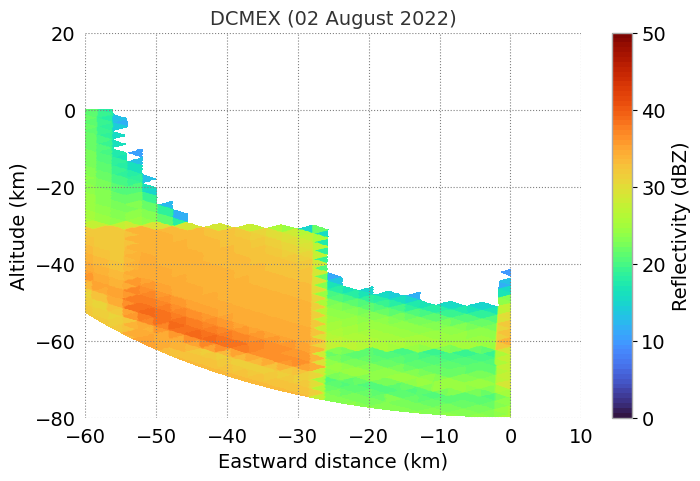

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


stime='2022-08-02T19:30:00.000000000'
etime='2022-08-02T20:00:00.000000000'

ds_sip_new = ds_4sip#.sel(ncells=mask,time=slice(stime, etime))

# ICON grid info
icon_lons = np.degrees(ds_sip_new['clon'].values)  # (ncells,)
icon_lats = np.degrees(ds_sip_new['clat'].values)  # (ncells,)

# Radar location
radar_lat = 34.0
radar_lon = -107.0
elev_angle = 4.0  # degrees

# Projection
import pyproj
proj = pyproj.Proj(proj='aeqd', lat_0=radar_lat, lon_0=radar_lon)
icon_x, icon_y = proj(icon_lons, icon_lats)  # (ncells,)

# PPI grid
azimuths = np.linspace(180, 270, 361)  # 0.25 deg steps
ranges = np.linspace(0, 80000, 400)    # up to 80 km, 200 m steps
az_grid, r_grid = np.meshgrid(azimuths, ranges, indexing='ij')
az_rad = np.radians(az_grid)

elev_rad = np.radians(elev_angle)
ppi_x = r_grid * np.sin(az_rad) * np.cos(elev_rad)
ppi_y = r_grid * np.cos(az_rad) * np.cos(elev_rad)
ppi_z = r_grid * np.sin(elev_rad)  # height above radar (meters)

# Prepare ICON vertical info
tidx = 0
z_mc = ds_sip_new['z_mc'].values[tidx]  # (height, ncells)
#dbz_icon = ds_4sip['dbz'].values[tidx]  # (height, ncells)
dbz_icon = ds_sip_new['dbz'].values[tidx]  # (height, ncells)
dbz_icon = np.where(dbz_icon <= -150, np.nan, dbz_icon)

nheight, ncells = z_mc.shape

# For each ICON cell, interpolate its vertical dBZ profile to the beam height at that cell
# The beam height at each ICON cell is the distance from radar to cell * sin(elev_angle)
# But for PPI, we want to interpolate horizontally at the beam height, so:
# For each ICON cell, get its (x, y), compute range from radar, then compute beam height

icon_range = np.sqrt(icon_x**2 + icon_y**2)
beam_height_icon = icon_range * np.sin(elev_rad)  # shape: (ncells,)

# Interpolate dBZ vertically for each cell to the beam height
dbz_at_beam = np.full(ncells, np.nan)
for i in range(ncells):
    z_profile = z_mc[:, i]
    dbz_profile = dbz_icon[:, i]
    # Remove NaNs
    mask = np.isfinite(z_profile) & np.isfinite(dbz_profile)
    z_valid = z_profile[mask]
    dbz_valid = dbz_profile[mask]
    if len(z_valid) > 1:
        # Sort by height
        sort_idx = np.argsort(z_valid)
        z_sorted = z_valid[sort_idx]
        dbz_sorted = dbz_valid[sort_idx]
        # Only interpolate if strictly increasing
        if np.all(np.diff(z_sorted) > 0):
            dbz_at_beam[i] = np.interp(
                beam_height_icon[i], z_sorted, dbz_sorted, left=np.nan, right=np.nan
            )
        #except Exception:
        #    dbz_at_beam[i] = np.nan

# Now, horizontally interpolate dbz_at_beam to the PPI grid
ppi_dbz = griddata(
    np.column_stack((icon_x, icon_y)), dbz_at_beam,
    (ppi_x, ppi_y), method='nearest'
)

# Plot
ppi_dbz_masked = np.where(ppi_dbz > 0, ppi_dbz, np.nan)
lev = np.linspace(0,50,80)
#lev = np.linspace(0, 60, 9)
cont_lev = range(0, 51, 10)
fontsize=14
# Plotting
plt.figure(figsize=(8, 5))
#fig, ax = plt.subplots(figsize=(8, 7))
x_km = ppi_x / 1000
y_km = ppi_y / 1000
#c = ax.contourf(x_km, y_km, ppi_dbz_masked, cmap='turbo', levels=lev)#, vmin=0, vmax=50)
cont = plt.contourf(x_km, y_km, ppi_dbz_masked, cmap='turbo', levels=lev, shading='auto')

#contour=plt.contour(-1*hor_dist, height, ds_rhi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)
plt.xlim(-60, 10)
plt.ylim(-80, 20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('DCMEX (02 August 2022)', fontsize=fontsize)
cb=plt.colorbar(cont, ticks=[0, 10, 20, 30, 40, 50], label='Reflectivity (dBZ)')
cb.ax.tick_params(labelsize=fontsize)
cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)
plt.show()

In [38]:
# Find ICON cells within 100 km of the radar (i.e., near the PPI grid)
icon_r = np.sqrt(icon_x**2 + icon_y**2)
near_radar = icon_r < 100000  # 100 km

print("ICON cells near radar:", np.sum(near_radar))
print("Valid dbz_at_beam near radar:", np.sum(~np.isnan(dbz_at_beam[near_radar])))
print("Sample dbz_at_beam near radar:", dbz_at_beam[near_radar][:20])


ICON cells near radar: 12696
Valid dbz_at_beam near radar: 9241
Sample dbz_at_beam near radar: [24.31297538 24.30809179 24.63296198 24.62984546 24.17690569 23.84980461
 23.85170308 23.40181734 23.41265084 23.75943685 23.74149374 24.18883624
 24.11893234 24.49173895 24.45806175 24.51906439 24.53704806 24.0919998
 24.44685735 24.49765927]


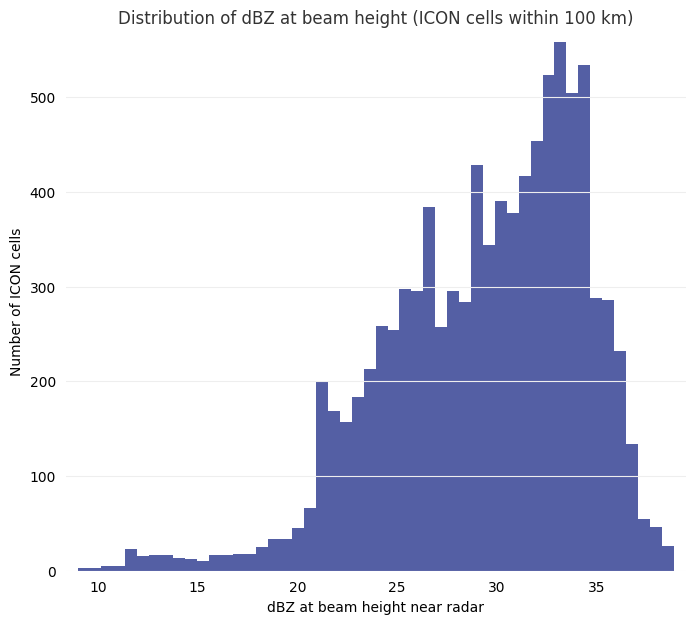

In [39]:
import matplotlib.pyplot as plt
plt.hist(dbz_at_beam[near_radar][~np.isnan(dbz_at_beam[near_radar])], bins=50)
plt.xlabel('dBZ at beam height near radar')
plt.ylabel('Number of ICON cells')
plt.title('Distribution of dBZ at beam height (ICON cells within 100 km)')
plt.show()


In [40]:
for i in np.where(near_radar)[0][:10]:
    z_profile = z_mc[:, i]
    dbz_profile = dbz_icon[:, i]
    mask = np.isfinite(z_profile) & np.isfinite(dbz_profile)
    z_valid = z_profile[mask]
    dbz_valid = dbz_profile[mask]
    print(f"Cell {i}: beam_height={beam_height_icon[i]}, z_min={z_valid.min() if len(z_valid)>0 else None}, z_max={z_valid.max() if len(z_valid)>0 else None}")


Cell 25535: beam_height=6874.07893767543, z_min=4432.85302734375, z_max=16438.19140625
Cell 25536: beam_height=6872.971849111119, z_min=4435.89306640625, z_max=16438.16796875
Cell 25537: beam_height=6944.983715366968, z_min=4445.87939453125, z_max=16438.16796875
Cell 25538: beam_height=6944.3279435635095, z_min=4446.89697265625, z_max=16438.171875
Cell 25540: beam_height=6843.954051547491, z_min=4440.47509765625, z_max=16438.138671875
Cell 25541: beam_height=6770.877406760349, z_min=4421.98681640625, z_max=16438.134765625
Cell 25542: beam_height=6771.502556886856, z_min=4436.29296875, z_max=16438.119140625
Cell 25543: beam_height=6670.502496393186, z_min=4411.9873046875, z_max=16438.072265625
Cell 25544: beam_height=6672.909418570332, z_min=4412.9697265625, z_max=16438.060546875
Cell 25545: beam_height=6750.637976842913, z_min=4425.318359375, z_max=16438.1015625


In [41]:

print("Valid PPI grid points after nearest interpolation:", np.sum(~np.isnan(ppi_dbz)))


Valid PPI grid points after nearest interpolation: 53141


In [42]:
print(ppi_dbz[~np.isnan(ppi_dbz)])

[ 9.84084745  9.84084745  9.84084745 ... 26.19034964 26.19034964
 26.19034964]


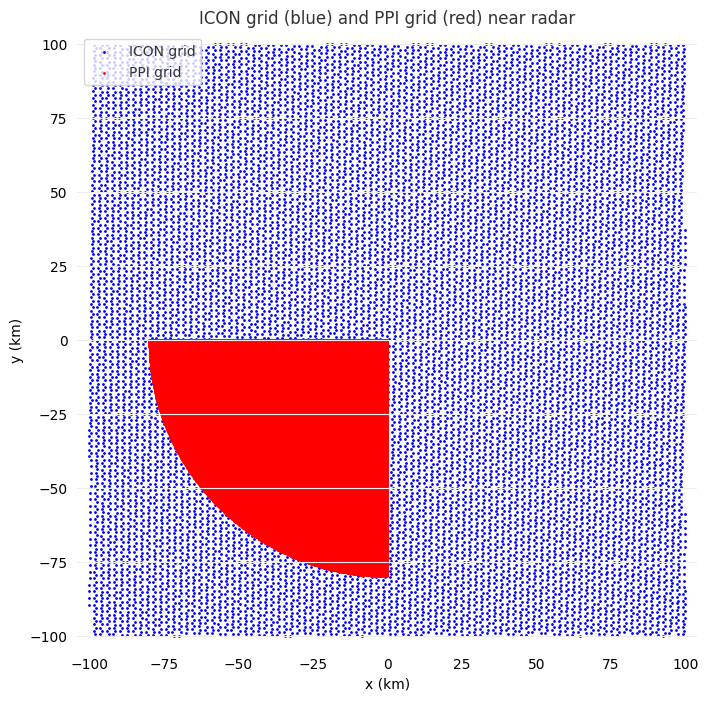

In [43]:

mask = (np.abs(icon_x) < 100000) & (np.abs(icon_y) < 100000)
plt.figure(figsize=(8,8))
plt.scatter(1.e-3*icon_x[mask], 1.e-3*icon_y[mask], s=1, color='b', label='ICON grid')
plt.scatter(1.e-3*ppi_x.flatten(), 1.e-3*ppi_y.flatten(), s=1, color='r', label='PPI grid')
plt.legend()
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('ICON grid (blue) and PPI grid (red) near radar')
plt.show()


In [44]:
for i in range(0, len(icon_x), len(icon_x)//10):  # sample 10 cells
    print(f"Cell {i}: z_profile min={z_mc[:,i].min()}, max={z_mc[:,i].max()}, beam_height={beam_height_icon[i]}")

Cell 0: z_profile min=1439.6539306640625, max=20700.92578125, beam_height=26479.85029994643
Cell 6620: z_profile min=2573.577392578125, max=20700.92578125, beam_height=11348.964171954034
Cell 13240: z_profile min=2201.18505859375, max=20700.92578125, beam_height=13619.397886891818
Cell 19860: z_profile min=1754.9287109375, max=20700.92578125, beam_height=22881.56749768121
Cell 26480: z_profile min=1874.105224609375, max=20700.92578125, beam_height=3901.3096565792275
Cell 33100: z_profile min=1897.45263671875, max=20700.92578125, beam_height=12630.097916018167
Cell 39720: z_profile min=1437.7611083984375, max=20700.92578125, beam_height=4271.708877670428
Cell 46340: z_profile min=2008.3660888671875, max=20700.92578125, beam_height=7519.380838478913
Cell 52960: z_profile min=1578.5960693359375, max=20700.92578125, beam_height=2271.0240485570025
Cell 59580: z_profile min=2384.407958984375, max=20700.92578125, beam_height=23589.211218110308
Cell 66200: z_profile min=1857.5648193359375, max

In [45]:
print(np.sum(~np.isnan(dbz_at_beam)), "ICON cells have valid dBZ at beam height (after sorting)")


41340 ICON cells have valid dBZ at beam height (after sorting)


In [46]:
for i in range(0, len(icon_x), len(icon_x)//10):  # sample 10 cells
    print(f"Cell {i}:")
    print("z_profile:", z_mc[:, i])
    print("dbz_profile:", dbz_icon[:, i])
    print("Any NaNs in z_profile?", np.any(np.isnan(z_mc[:, i])))
    print("Any NaNs in dbz_profile?", np.any(np.isnan(dbz_icon[:, i])))


Cell 0:
z_profile: [20700.926  18707.63   17459.836  16435.898  15546.913  14750.141
 14025.778  13359.568  12741.68   12164.97   11624.041  11114.689
 10633.56   10177.919   9745.504   9334.414   8943.032   8569.965
  8214.001   7874.0767  7549.249   7238.6772  6941.603   6657.34
  6385.2593  6124.786   5875.386   5636.5635  5407.855   5188.8247
  4979.062   4778.1777  4585.8013  4401.58    4225.1777  4056.2715
  3894.552   3739.7224  3591.4983  3449.606   3313.7832  3183.779
  3059.3533  2940.2761  2826.3303  2717.3088  2613.0178  2513.275
  2417.9114  2326.7725  2239.719   2156.627   2077.3916  2001.9271
  1930.171   1862.0869  1797.6693  1736.9513  1680.0138  1627.0027
  1578.1548  1533.8469  1494.6989  1463.0829  1439.6539]
dbz_profile: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan 

In [47]:
for i in range(0, len(icon_x), len(icon_x)//10):
    print(f"Cell {i}: is monotonic?", np.all(np.diff(z_mc[:, i]) > 0))


Cell 0: is monotonic? False
Cell 6620: is monotonic? False
Cell 13240: is monotonic? False
Cell 19860: is monotonic? False
Cell 26480: is monotonic? False
Cell 33100: is monotonic? False
Cell 39720: is monotonic? False
Cell 46340: is monotonic? False
Cell 52960: is monotonic? False
Cell 59580: is monotonic? False
Cell 66200: is monotonic? False


In [48]:
print("Valid ICON cells at beam height:", np.sum(~np.isnan(dbz_at_beam)))
print("Valid PPI grid points after interpolation:", np.sum(~np.isnan(ppi_dbz)))
print("Valid PPI grid points >0 dBZ:", np.sum(ppi_dbz_masked > 0))


Valid ICON cells at beam height: 41340
Valid PPI grid points after interpolation: 53141
Valid PPI grid points >0 dBZ: 53141


# Get time-height REFL plot from PPI data

In [49]:
import re
from datetime import datetime

# Function to extract time and elevation from filenames using regex.

def parse_filename(filename):
    # Example: cfrad.20220802_190259.360_to_20220802_190305.238_SR1_v1_s00_el1.60_PPI.nc
    time_match = re.search(r'cfrad\.(\d{8}_\d{6}\.\d+)', filename)
    el_match = re.search(r'el(\d+\.\d+)', filename)
    if time_match and el_match:
        time_str = time_match.group(1)  # '20220802_190259.360'
        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S.%f")
        elevation = float(el_match.group(1))
        return time, elevation
    else:
        return None, None


# Function to read Reflectivity (DBZ) and Range

def read_reflectivity(file):
    ds = xr.open_dataset(file)
    # Try common variable names
    for var in ['reflectivity', 'DBZ', 'ZH']:
        if var in ds.variables:
            refl = ds[var].values
            break
    else:
        raise ValueError(f"Reflectivity variable not found in {file}")
    # Range in meters
    if 'range' in ds.variables:
        rng = ds['range'].values
    else:
        rng = ds['gate'].values  # fallback
    ds.close()
    return refl, rng


#Build the Time-Height Matrix
#For each file:
    #Get the time (UTC), elevation (degrees), and reflectivity profile (as a function of range).
    #Convert elevation + range → height above radar (using simple trigonometry).
def range_elev_to_height(range_m, elev_deg):
    # Height above radar in km
    return range_m * np.sin(np.deg2rad(elev_deg)) / 1000.0


#Aggregate Data
#For each file, extract:
#    UTC time
#    Height array (from range and elevation)
#    Reflectivity profile (e.g., mean over azimuth)
#Store these in a list for later plotting.

import glob

#file_path='/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802'
#ds_rhi = xr.open_mfdataset(f'{file_path}/cfrad.20220802_195806.088_to_20220802_195811.678_SR1_v13_s00_az224.00_RHI.nc');

data = []
files = sorted(glob.glob("/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/cfrad.*_PPI.nc"))  # adjust path as needed

for file in files:
    time, elev = parse_filename(file)
    if time is None:
        continue
    refl, rng = read_reflectivity(file)
    # Take mean over azimuth (axis 0 or 1, check shape)
    if refl.ndim == 2:
        # Usually (azimuth, range)
        refl_profile = np.nanmean(refl, axis=0)
    else:
        refl_profile = refl
    heights = range_elev_to_height(rng, elev)
    data.append({'time': time, 'height': heights, 'reflectivity': refl_profile})


In [100]:
# Define common height grid (e.g., 0 to 10 km, every 0.1 km)
height_grid = np.arange(0, 10, 0.1)
times = []
refl_matrix = []

for entry in data:
    times.append(entry['time'])
    # Interpolate reflectivity to common height grid
    interp_refl = np.interp(height_grid, entry['height'], entry['reflectivity'], left=np.nan, right=np.nan)
    refl_matrix.append(interp_refl)

refl_matrix = np.array(refl_matrix)  # shape: (ntimes, nheights)


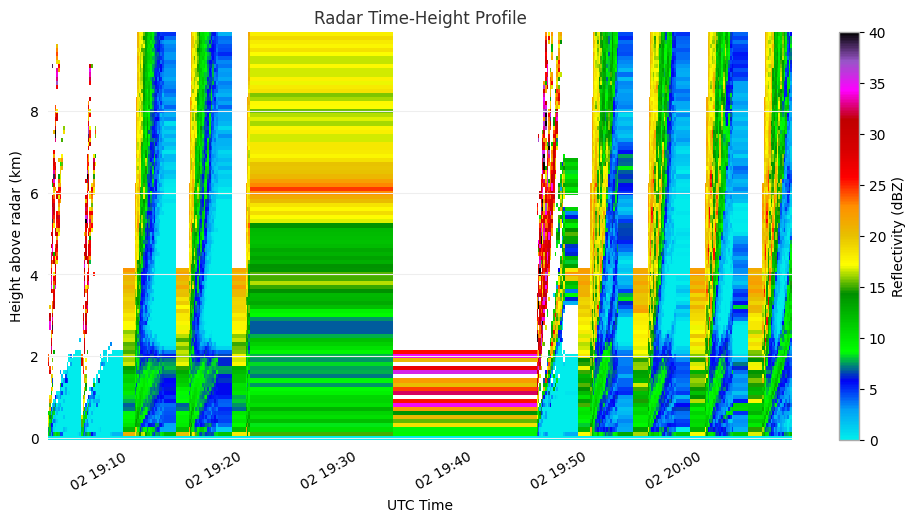

In [102]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,6))
X, Y = np.meshgrid(mdates.date2num(times), height_grid)
pcm = ax.pcolormesh(X, Y, refl_matrix.T, cmap='pyart_NWSRef', shading='auto', vmin=0, vmax=40)
ax.set_ylabel("Height above radar (km)")
ax.set_xlabel("UTC Time")
ax.xaxis_date()
fig.autofmt_xdate()
plt.colorbar(pcm, label="Reflectivity (dBZ)")
plt.title("Radar Time-Height Profile")
plt.show()


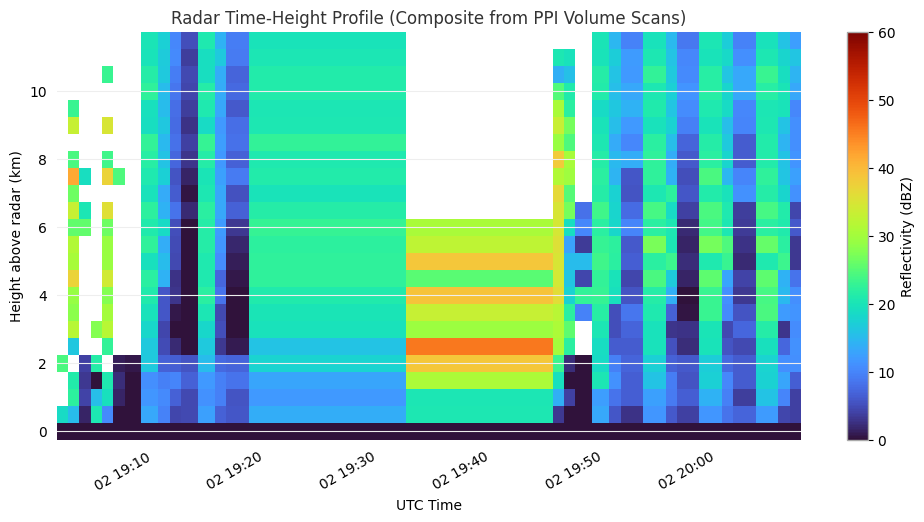

In [107]:
import re
from datetime import datetime, timedelta
import numpy as np
import xarray as xr
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Helper functions ---

def parse_filename(filename):
    time_match = re.search(r'cfrad\.(\d{8}_\d{6})\.\d+', filename)
    el_match = re.search(r'el(\d+\.\d+)', filename)
    if time_match and el_match:
        time_str = time_match.group(1)  # '20220802_190259'
        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S")
        elevation = float(el_match.group(1))
        return time, elevation
    else:
        return None, None

def read_reflectivity(file):
    ds = xr.open_dataset(file)
    for var in ['reflectivity', 'DBZ', 'ZH']:
        if var in ds.variables:
            refl = ds[var].values
            break
    else:
        raise ValueError(f"Reflectivity variable not found in {file}")
    if 'range' in ds.variables:
        rng = ds['range'].values
    else:
        rng = ds['gate'].values
    ds.close()
    return refl, rng

def range_elev_to_height(range_m, elev_deg):
    # Height above radar in km
    return range_m * np.sin(np.deg2rad(elev_deg)) / 1000.0

# --- Group files by volume scan time ---

files = sorted(glob.glob("/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/cfrad.*_PPI.nc"))

# Group by volume scan: here, files within 1 minute are grouped together
volume_groups = defaultdict(list)
for file in files:
    time, elev = parse_filename(file)
    if time is None:
        continue
    # Round time to nearest minute for grouping
    vol_time = time.replace(second=0, microsecond=0)
    volume_groups[vol_time].append((file, elev))

# --- Build composite vertical profiles for each volume scan ---

height_grid = np.arange(0, 12, 0.5)  # 0 to 12 km, 100 m bins
time_list = []
refl_profiles = []

for vol_time, file_elev_list in sorted(volume_groups.items()):
    # For each elevation, get reflectivity and height
    all_heights = []
    all_refls = []
    for file, elev in file_elev_list:
        refl, rng = read_reflectivity(file)
        if refl.ndim == 2:
            refl_profile = np.nanmean(refl, axis=0)
        else:
            refl_profile = refl
        heights = range_elev_to_height(rng, elev)
        all_heights.append(heights)
        all_refls.append(refl_profile)
    # For each height in grid, take the max reflectivity from all elevations
    refl_at_heights = np.full_like(height_grid, np.nan, dtype=float)
    for i, h in enumerate(height_grid):
        vals = []
        for heights, refl_profile in zip(all_heights, all_refls):
            idx = np.abs(heights - h).argmin()
            # Use value if height is within 100 m
            if np.abs(heights[idx] - h) < 0.5:
                vals.append(refl_profile[idx])
        if vals:
            refl_at_heights[i] = np.nanmax(vals)
    time_list.append(vol_time)
    refl_profiles.append(refl_at_heights)

refl_matrix = np.array(refl_profiles)  # shape: (ntimes, nheights)

# --- Plotting ---

fig, ax = plt.subplots(figsize=(12,6))
X, Y = np.meshgrid(mdates.date2num(time_list), height_grid)
pcm = ax.pcolormesh(X, Y, refl_matrix.T, cmap='turbo', shading='auto', vmin=0, vmax=60)
ax.set_ylabel("Height above radar (km)")
ax.set_xlabel("UTC Time")
ax.xaxis_date()
fig.autofmt_xdate()
plt.colorbar(pcm, label="Reflectivity (dBZ)")
plt.title("Radar Time-Height Profile (Composite from PPI Volume Scans)")
plt.show()


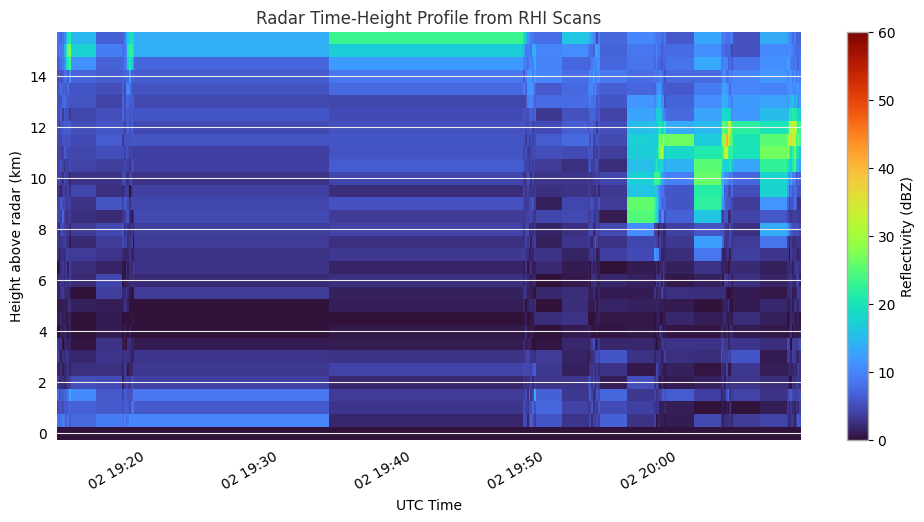

In [112]:
import xarray as xr
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def parse_rhi_filename(filename):
    # Example: cfrad.20220802_195806.088_to_20220802_195811.678_SR1_v13_s00_az224.00_RHI.nc
    import re
    time_match = re.search(r'cfrad\.(\d{8}_\d{6})\.\d+', filename)
    if time_match:
        time_str = time_match.group(1)
        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S")
        return time
    else:
        return None

def range_elev_to_height(range_m, elev_deg):
    return range_m * np.sin(np.deg2rad(elev_deg)) / 1000.0  # km

# Get all RHI files
rhi_files = sorted(glob.glob("/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/*RHI.nc"))
height_grid = np.arange(0, 16, 0.5)  # 0 to 16 km, 100 m bins
time_list = []
refl_profiles = []

for file in rhi_files:
    time = parse_rhi_filename(file)
    if time is None:
        continue
    ds = xr.open_dataset(file)
    # Find reflectivity variable
    for var in ['reflectivity', 'DBZ', 'ZH']:
        if var in ds.variables:
            refl = ds[var].values
            break
    else:
        continue
    # Get range and elevation
    rng = ds['range'].values  # meters
    elev = ds['elevation'].values  # degrees, shape (n_elevations,)
    # Average over azimuth if needed, or select a fixed azimuth slice
    # For a single RHI scan, usually one azimuth, multiple elevations
    # Take mean over azimuth if more than one
    if refl.ndim == 2:
        # (elevation, range)
        refl_profile = np.nanmean(refl, axis=0)
        elev_profile = np.nanmean(elev)
    else:
        refl_profile = refl
        elev_profile = elev
    heights = range_elev_to_height(rng, elev_profile)
    # Interpolate to common height grid
    interp_refl = np.interp(height_grid, heights, refl_profile, left=np.nan, right=np.nan)
    time_list.append(time)
    refl_profiles.append(interp_refl)
    ds.close()

refl_matrix = np.array(refl_profiles)

# Plot
fig, ax = plt.subplots(figsize=(12,6))
X, Y = np.meshgrid(mdates.date2num(time_list), height_grid)
pcm = ax.pcolormesh(X, Y, refl_matrix.T, cmap='turbo', shading='auto', vmin=0, vmax=60)
ax.set_ylabel("Height above radar (km)")
ax.set_xlabel("UTC Time")
ax.xaxis_date()
fig.autofmt_xdate()
plt.colorbar(pcm, label="Reflectivity (dBZ)")
plt.title("Radar Time-Height Profile from RHI Scans")
plt.show()


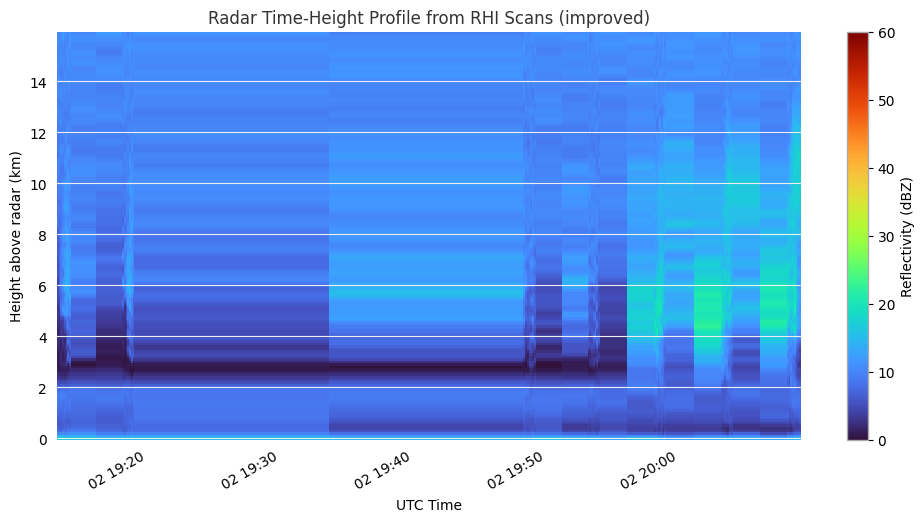

In [167]:
import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d

def parse_rhi_filename(filename):
    import re
    time_match = re.search(r'cfrad\.(\d{8}_\d{6})\.\d+', filename)
    if time_match:
        time_str = time_match.group(1)
        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S")
        return time
    else:
        return None

def range_elev_to_height(range_m, elev_deg):
    # returns 2D array: (elevation, range)
    elev_rad = np.deg2rad(elev_deg)
    return range_m[None, :] * np.sin(elev_rad[:, None]) / 1000.0



# Get all RHI files
rhi_files = sorted(glob.glob("/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/*RHI.nc"))

height_grid = np.arange(0, 16, 0.1)  # 0 to 16 km, 100 m bins
time_list = []
refl_profiles = []

for file in rhi_files:
    time = parse_rhi_filename(file)
    if time is None:
        continue
    ds = xr.open_dataset(file)
    # Find reflectivity variable
    for var in ['reflectivity', 'DBZ', 'ZH']:
        if var in ds.variables:
            refl = ds[var].values
            break
    else:
        continue
    rng = ds['range'].values  # meters
    elev = ds['elevation'].values  # degrees
    # refl shape: (elevation, range)
    heights = range_elev_to_height(rng, elev)
    # Flatten all (elevation, range) pairs into 1D arrays
    heights_flat = heights.flatten()
    refl_flat = refl.flatten()
    refl_flat[refl_flat <= -10] = np.nan
    # For each height in height_grid, take the max reflectivity from all (elev, range) pairs within 100 m
    refl_at_heights = np.full_like(height_grid, np.nan, dtype=float)
    for i, h in enumerate(height_grid):
        idx = np.where(np.abs(heights_flat - h) < 0.1)[0]
        if len(idx) > 0:
            refl_at_heights[i] = np.nanmean(refl_flat[idx])
    # Optional: smooth the profile (Gaussian filter)
    refl_at_heights = gaussian_filter1d(refl_at_heights, sigma=1, mode='nearest', truncate=2.0)
    time_list.append(time)
    refl_profiles.append(refl_at_heights)
    ds.close()

refl_matrix = np.array(refl_profiles)

# Plot
fig, ax = plt.subplots(figsize=(12,6))
X, Y = np.meshgrid(mdates.date2num(time_list), height_grid)
pcm = ax.pcolormesh(X, Y, refl_matrix.T, cmap='turbo', shading='auto', vmin=0, vmax=60)
ax.set_ylabel("Height above radar (km)")
ax.set_xlabel("UTC Time")
ax.xaxis_date()
fig.autofmt_xdate()
plt.colorbar(pcm, label="Reflectivity (dBZ)")
plt.title("Radar Time-Height Profile from RHI Scans (improved)")
plt.show()

In [ ]:

ds_rhi = xr.open_mfdataset('');
ds_rhi

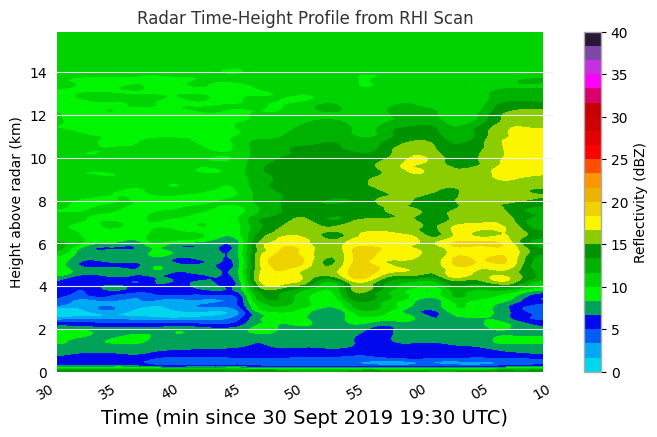

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d

def parse_rhi_filename(filename):
    import re
    time_match = re.search(r'cfrad\.(\d{8}_\d{6})\.\d+', filename)
    if time_match:
        time_str = time_match.group(1)
        time = datetime.strptime(time_str, "%Y%m%d_%H%M%S")
        return time
    else:
        return None

def range_elev_to_height(range_m, elev_deg):
    # returns 2D array: (elevation, range)
    elev_rad = np.deg2rad(elev_deg)
    return range_m[None, :] * np.sin(elev_rad[:, None]) / 1000.0



# Get all RHI files
rhi_files = sorted(glob.glob("/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/*RHI.nc"))

height_grid = np.arange(0, 16, 0.1)  # 0 to 16 km, 100 m bins
time_list = []
refl_profiles = []

for file in rhi_files:
    time = parse_rhi_filename(file)
    if time is None:
        continue
    ds = xr.open_dataset(file)
    # Find reflectivity variable
    for var in ['reflectivity', 'DBZ', 'ZH']:
        if var in ds.variables:
            refl = ds[var].values
            break
    else:
        continue
    rng = ds['range'].values  # meters
    elev = ds['elevation'].values  # degrees
    # refl shape: (elevation, range)
    heights = range_elev_to_height(rng, elev)
    # Flatten all (elevation, range) pairs into 1D arrays
    heights_flat = heights.flatten()
    refl_flat = refl.flatten()
    refl_flat[refl_flat <= -10] = np.nan
    # For each height in height_grid, take the max reflectivity from all (elev, range) pairs within 100 m
    refl_at_heights = np.full_like(height_grid, np.nan, dtype=float)
    for i, h in enumerate(height_grid):
        idx = np.where(np.abs(heights_flat - h) < 0.1)[0]
        if len(idx) > 0:
            refl_at_heights[i] = np.nanmean(refl_flat[idx])
    # Optional: smooth the profile (Gaussian filter)
    refl_at_heights = gaussian_filter1d(refl_at_heights, sigma=1, mode='nearest', truncate=2.0)
    time_list.append(time)
    refl_profiles.append(refl_at_heights)
    ds.close()

refl_matrix = np.array(refl_profiles)


# Prepare the grid
ntime, nheight = refl_matrix.shape
T, H = np.meshgrid(np.arange(ntime), height_grid, indexing='ij')  # Use 'ij' indexing!
mask = ~np.isnan(refl_matrix)
points = np.column_stack((T[mask], H[mask]))
values = refl_matrix[mask]


# Define a finer grid for interpolation
fine_time = np.linspace(0, ntime-1, ntime*2)
fine_height = np.linspace(height_grid[0], height_grid[-1], nheight*4)
Fine_T, Fine_H = np.meshgrid(fine_time, fine_height)

# Interpolate
refl_interp = griddata(points, values, (Fine_T, Fine_H), method='nearest')

# Optional: smooth with a Gaussian filter
refl_smooth = gaussian_filter(refl_interp, sigma=2)

# Plot
lev=np.linspace(0,40,25)
fig, ax = plt.subplots(figsize=(8,5))
# Convert fine_time to datetime for x-axis
fine_time_dt = mdates.date2num([time_list[0] + (time_list[-1]-time_list[0]) * t/(ntime-1) for t in fine_time])
pcm = ax.contourf(fine_time_dt, fine_height, refl_smooth, cmap='pyart_NWSRef', levels=lev)#, shading='auto', vmin=0, vmax=60)
ax.set_ylabel("Height above radar (km)")
ax.set_xlabel("UTC Time")
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel('Time (min since 30 Sept 2019 19:30 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M'))
start_date = datetime(2022, 8, 2, 19, 30) 
end_date = datetime(2022, 8, 2, 20, 10)

plt.xlim(start_date, end_date)
plt.colorbar(pcm, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40] ,label="Reflectivity (dBZ)")
plt.title("Radar Time-Height Profile from RHI Scan")
plt.show()


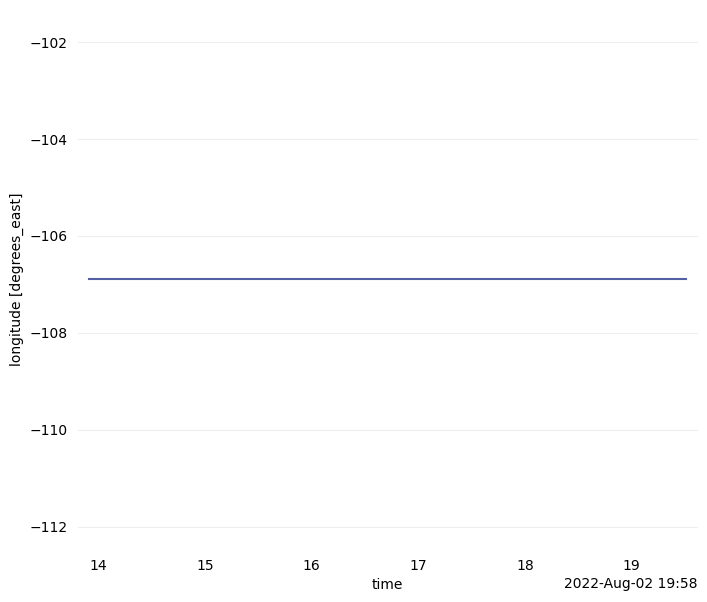

In [71]:

ds_rhi.longitude.plot()

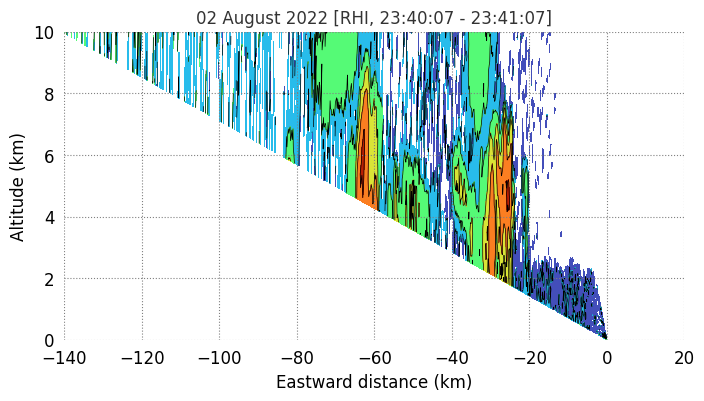

In [68]:


ds_rhi = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/cfrad.20220802_195813.915_to_20220802_195819.506_SR1_v13_s01_az225.50_RHI.nc');


ds_rhi['refl'] = xr.where(ds_rhi.DBZ > 0., ds_rhi.DBZ, np.nan)
 
## Need to convert radar data from polar to cartesian coordinate to plot properly 

## To plot range-height plot, convert data into horizontal distance and height from ds.range and ds.elevation 

# Get azimuth and range, convert to radians and km

theta_elev = ds_rhi['elevation'].values             # shape: (elevation,)
range_gate = ds_rhi['range'].values * 1e-3     # convert m to km, shape: (range,)
theta = np.deg2rad(theta_elev)                # radians


# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)

# 2D grids for (azimuth, range)
r_grid, theta_grid = np.meshgrid(range_gate, theta)

# Convert polar to Cartesian
hor_dist = r_grid * np.cos(theta_grid)            # horizontal distance (km)
height = r_grid * np.sin(theta_grid)            # height (km)

lev = np.linspace(0, 60, 7)
cont_lev = range(0, 51, 10)
fontsize=12


# Plotting
plt.figure(figsize=(8, 4))
cont = plt.contourf(-1*hor_dist, height, ds_rhi.refl, cmap='turbo', levels=lev, shading='auto')

contour=plt.contour(-1*hor_dist, height, ds_rhi.refl, levels=cont_lev, colors='k', linestyles='-', linewidths=0.5)
#plt.clabel(contour, inline=True, fontsize=fontsize-2, fmt='%d')

plt.grid(True, linestyle=':', color='grey', alpha=1.0)
plt.xlim(-140, 20)
plt.ylim(0, 10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Eastward distance (km)', fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)
plt.title('02 August 2022 [RHI, 23:40:07 - 23:41:07]', fontsize=fontsize)
#cb=plt.colorbar(cont, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Reflectivity (dBZ)')
#cb.ax.tick_params(labelsize=fontsize)
#cb.set_label(label='Reflectivity (dBZ)', size=fontsize)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

plt.show()

In [64]:

#ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/control/dcmex_2mom_sip/NWP_*.nc');

stime='2022-08-02T19:30:00.000000000'
etime='2022-08-02T21:00:00.000000000'

ds_refl_4sip = ds_4sip.sel(ncells=mask,time=slice(stime, etime))

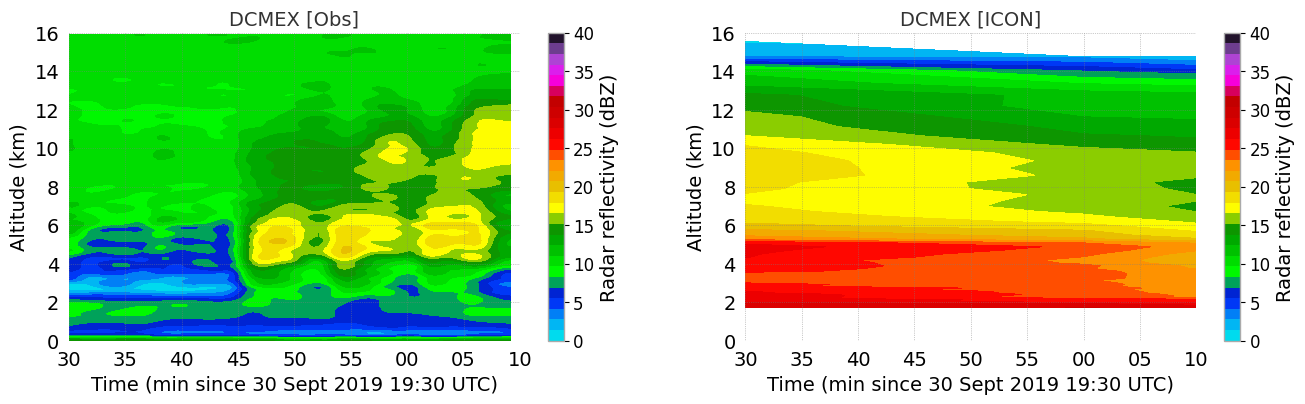

In [65]:

#ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/nested_run/icon_output/continental_ccn/latent_heat/control/dcmex_2mom_sip/NWP_*.nc');

stime='2022-08-02T19:30:00.000000000'
etime='2022-08-02T21:00:00.000000000'

ds_refl_4sip = ds_4sip.sel(ncells=mask,time=slice(stime, etime))


avg_ht = 1.e-3*ds_refl_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = ds_refl_4sip.dbz.where(ds_refl_4sip.dbz > 0).mean(dim=('ncells'))
#avg_refl_sip = ds_4sip.dbz.mean(dim=('ncells'))

colors = ['cyan', 'deepskyblue', 'mediumblue', 'lawngreen', 'limegreen', 'green', 'yellow', 'gold', 'goldenrod', 
          'coral', 'orangered', 'red', 'lightcoral', 'magenta', 'darkorchid', 'pink']
cmap = ListedColormap(colors)

lnwdth = 3
fontsize = 14
lev = np.linspace(0, 40, 30)

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
contour = plt.contourf(fine_time_dt, fine_height, refl_smooth, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 30 Sept 2019 19:30 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M'))
start_date = datetime(2022, 8, 2, 19, 30) 
end_date = datetime(2022, 8, 2, 20, 10)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 16])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('DCMEX [Obs]', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
contour = plt.contourf(ds_refl_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 30 Sept 2019 19:30 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M'))
start_date = datetime(2022, 8, 2, 19, 30) 
end_date = datetime(2022, 8, 2, 20, 10)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 16])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('DCMEX [ICON]', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()



### ICON reflectivity cross-section along 107°W and 34°N (Corresponding to RHI scan)


[0.06301077 0.06309677 0.06291778 ... 0.04931729 0.04919362 0.04931526]


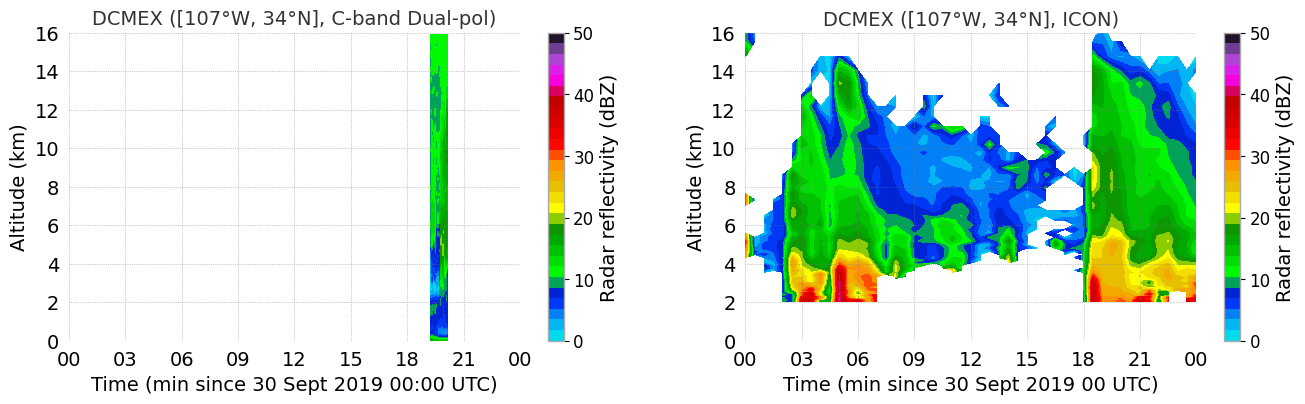

In [107]:
import numpy as np

# Convert target coordinates to radians
target_lon_rad = np.deg2rad(-107)
target_lat_rad = np.deg2rad(34)

# Extract lon/lat arrays (no parentheses!)
clon = ds_4sip.clon.values
clat = ds_4sip.clat.values

# Define a tolerance (in radians, e.g., ~0.01 rad ≈ 60 km)
tolerance = 0.01

# Find closest cells within the tolerance
distance = np.sqrt((clon - target_lon_rad)**2 + (clat - target_lat_rad)**2)
selected_cells = np.where(distance < tolerance)[0]

print(distance)
# Extract dbz for those cells
dbz_section = ds_4sip['dbz'][:, :, selected_cells]


avg_ht = 1.e-3*ds_4sip.z_mc.mean(dim=('time','ncells'))
avg_refl_sip = dbz_section.where(dbz_section > 0).mean(dim=('ncells'))


######### Plotting

lnwdth = 3
fontsize = 14
lev = np.linspace(0, 50, 30)

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
contour = plt.contourf(fine_time_dt, fine_height, refl_smooth, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 30 Sept 2019 00:00 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2022, 8, 2, 0, 0) 
end_date = datetime(2022, 8, 3, 0, 0)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 16])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('DCMEX ([107°W, 34°N], C-band Dual-pol)', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 30 Sept 2019 00 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2022, 8, 2, 0, 0) 
end_date = datetime(2022, 8, 3, 0, 0)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 16])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('DCMEX ([107°W, 34°N], ICON)', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

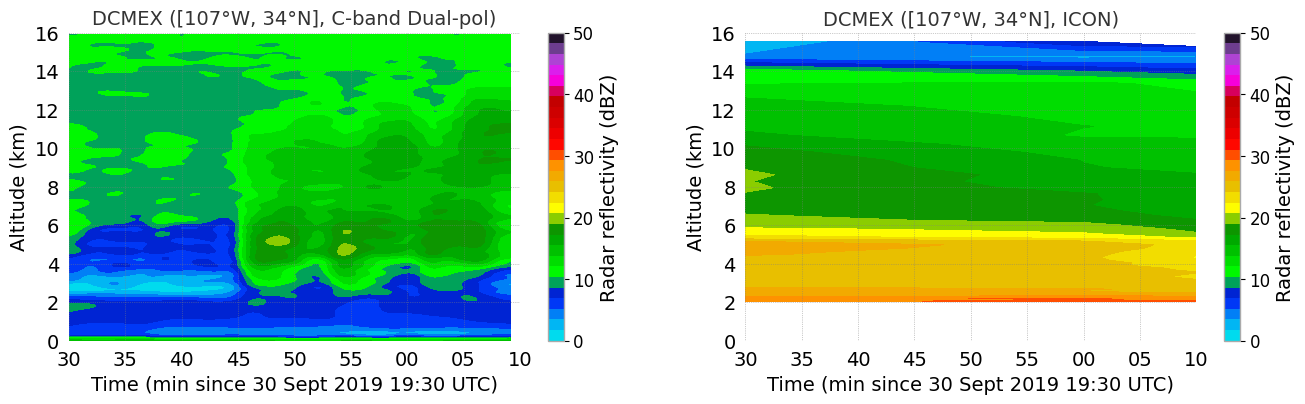

In [108]:

lnwdth = 3
fontsize = 14
lev = np.linspace(0, 50, 30)

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
contour = plt.contourf(fine_time_dt, fine_height, refl_smooth, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 30 Sept 2019 19:30 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M'))
start_date = datetime(2022, 8, 2, 19, 30) 
end_date = datetime(2022, 8, 2, 20, 10)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 16])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('DCMEX ([107°W, 34°N], C-band Dual-pol)', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.subplot(1,2,2)
contour = plt.contourf(ds_4sip.time, avg_ht, avg_refl_sip.T, cmap='pyart_NWSRef', levels=lev)
#colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50, 60, 70], label='Radar reflectivity (dBZ)')
colorbar = plt.colorbar(contour, ticks=[0, 10, 20, 30, 40, 50], label='Radar reflectivity (dBZ)')
colorbar.ax.tick_params(labelsize=12)
colorbar.set_label(label='Radar reflectivity (dBZ)', size=fontsize)

plt.xlabel('Time (min since 30 Sept 2019 19:30 UTC)', fontsize=fontsize)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M'))
start_date = datetime(2022, 8, 2, 19, 30) 
end_date = datetime(2022, 8, 2, 20, 10)

plt.xlim(start_date, end_date)

plt.xticks(fontsize=fontsize)

plt.ylim([0, 16])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize=fontsize)
plt.ylabel('Altitude (km)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.title('DCMEX ([107°W, 34°N], ICON)', fontsize=fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()

In [27]:

def calc_dewpoint(tempc, rh):
    dewpoint = tempc - ((100. - rh)/5.)
    return dewpoint


def calc_tdew(t, rh):        # Magnus-Tetens approximation
    a = 17.27; b = 237.7;
    alpha = (a*t/(b+t)) + np.log(rh/100)
    td = b*alpha/(a-alpha)
    return td
    
def calc_vir_temp(tc, q):
    #virt_tempk_wk = t/(1. - (ev/p)*(1-0.622))
    temp = tc + (1-0.622*q)
    return temp
    
def calculate_lcl(pressure, temperature, dewpoint):
    l = np.argmin(np.abs(temperature - dewpoint))
    return pressure[l], temperature[l]

def calc_lcl(t, td):
    lcl = td + 125.*(t-td)
    return lcl
    
def e_sat_hpa(tc):
    e_sat_pa = 6.112*np.exp((17.67*tc)/(tc+243.5))
    return e_sat_pa

def calc_parcel_temp(pres, ht, q_sat, tk_lcl):
    grav = 9.8  # acceleration due to gravity [m/s^2]
    eps = 0.622  # ratio of the gas constants for water vapor and dry air
    Rd = 287.  # specific gas constant for dry air [J/(kg*K)]
    cp = 1005.  # specific heat capacity at constant pressure for dry air [J/(kg*K)]
    lv = 2.5e6  # latent heat of vaporization [J/kg]
    Rv = 461.  # specific gas constant for water vapor [J/(kg*K)]

    tk_parcel = np.zeros(len(ht))  
    del_t_par = np.zeros(len(ht))  

    tk_parcel[0] = tk_lcl + 273.15 
    
    for i in range(1, len(ht)):
        dht = ht[i] - ht[i - 1]  
        qs = q_sat[i]  
        term_a = 1. + lv * qs / (Rd * tk_parcel[i - 1])
        term_b = (lv ** 2.) * eps * qs
        term_c = Rd * (tk_parcel[i - 1]) ** 2.
        
        del_t_par[i] = grav * term_a / (cp + (term_b / term_c))

        tk_parcel[i] = tk_parcel[i - 1] - del_t_par[i] * dht
        
    tempc = tk_parcel - 273.15
    return tempc

import numpy as np



def calc_cape(pres, t_env, t_par, tv_env, tv_par):
    """
    Calculate Convective Available Potential Energy (CAPE).
    
    Parameters:
        pres (array): Pressure levels (hPa or Pa).
        t_env (array): Environmental temperature (°C).
        t_par (array): Parcel temperature (°C).
        tv_env (array): Environmental virtual temperature (°C).
        tv_par (array): Parcel virtual temperature (°C).
    
    Returns:
        cape (float): CAPE value (J/kg).
    """
    Rd = 287.0  # gas constant for dry air (J/kg/K)
    
    # Convert temperatures to Kelvin
    tk_env = t_env + 273.15
    tk_v_env = tv_env + 273.15
    tk_par = t_par + 273.15
    tk_v_par = tv_par + 273.15
    
    cape = 0.0
    
    # Loop through pressure levels
    for i in range(1, len(pres)):
        # Check if parcel is warmer than the environment
        if tk_v_par[i] > tk_v_env[i]:
            # Calculate logarithmic pressure difference
            dlnp = np.log(pres[i-1] / pres[i])
            cape = cape + Rd * (tk_v_par[i] - tk_v_env[i]) * dlnp
    return cape
        

In [28]:
ds_4sip.time[26]

<xarray.DataArray 'time' ()>
array('2022-08-02T13:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-08-02T13:00:00
Attributes:
    standard_name:  time
    axis:           T

In [30]:
print(lcl_temp)

19.04552


CAPE ::  1021.1269912698493


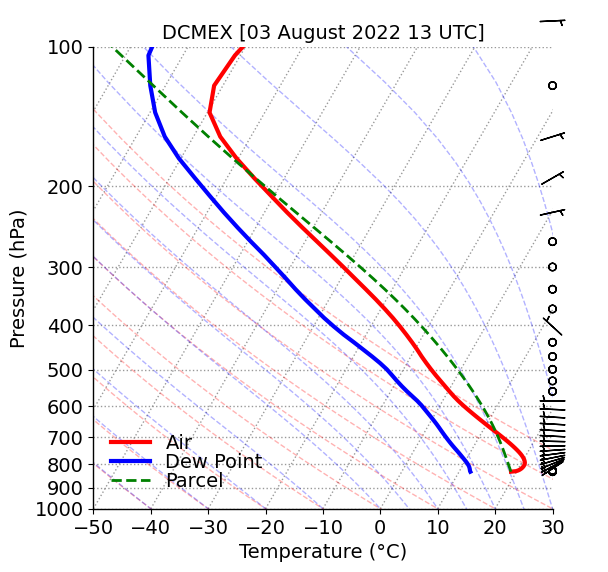

In [53]:

ds_skewt = ds_4sip.sel(time=ds_4sip.time[26])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)
#temp_dew = calc_tdew(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

#----- Calculate parcel properties
e_sat = e_sat_hpa(avg_tempc)
q_sat = 0.622*e_sat/(avg_pres-e_sat)

lcl_pressure, lcl_temp = calculate_lcl(avg_pres, avg_tempc, avg_dewtempc)
#lcl_temp = calc_lcl(avg_tempc[0], avg_dewtempc)
parcel_temp = calc_parcel_temp(avg_pres, avg_ht, q_sat, lcl_temp)
Tv_env = calc_vir_temp(avg_tempc, avg_qv)
Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
parcel_cape = calc_cape(avg_pres, avg_tempc, parcel_temp, Tv_env, Tv_parcel)
print('CAPE :: ',parcel_cape)
#------

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 6))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air', linewidth=lnwdth)
#skew.plot(avg_pres, calc_dewpoint(avg_tempc, avg_rh), 'b-.', label='Dew Point', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point', linewidth=lnwdth)
skew.plot(avg_pres, parcel_temp, 'g--', label='Parcel', linewidth=lnwdth-1)
# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 30)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('DCMEX [03 August 2022 13 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()

In [33]:
ds_sonde

<xarray.Dataset>
Dimensions:         (time: 1621, obs: 1)
Coordinates:
  * time            (time) datetime64[ns] 2022-08-02T15:59:46.390014648 ... 2...
    lat             (time) float32 ...
    lon             (time) float32 ...
    gpsalt          (time) float32 ...
Dimensions without coordinates: obs
Data variables: (12/27)
    trajectory      |S1 ...
    launch_time     datetime64[ns] ...
    pres            (time) float32 746.5 746.2 nan 746.3 nan ... nan nan nan nan
    tdry            (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    dp              (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    rh              (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...              ...
    reference_rh    (obs) float32 ...
    reference_wspd  (obs) float32 ...
    reference_wdir  (obs) float32 ...
    reference_lat   (obs) float32 ...
    reference_lon   (obs) float32 ...
    reference_alt   (obs) float32 ...
Attributes: (12/93)
    Conventions:            CF-1.6
    RepoRevision:           V3.4.6
    RepoLastChangedDate:    Fri Apr 30 16:17:27 2021 -0600
    RepoId:                 163b1128fa837a96c93dfe8a59c915ff3185b748
    RepoBranch:             HEAD
    featureType:            trajectory
    ...                     ...
    WindQCDev:              999
    WindQCWL:               30
    WindSats:               6
    WindSmoothWL:           10
    WindVVPresWL:           5
    WindVVdelta:            2.5

CAPE ::  0.0


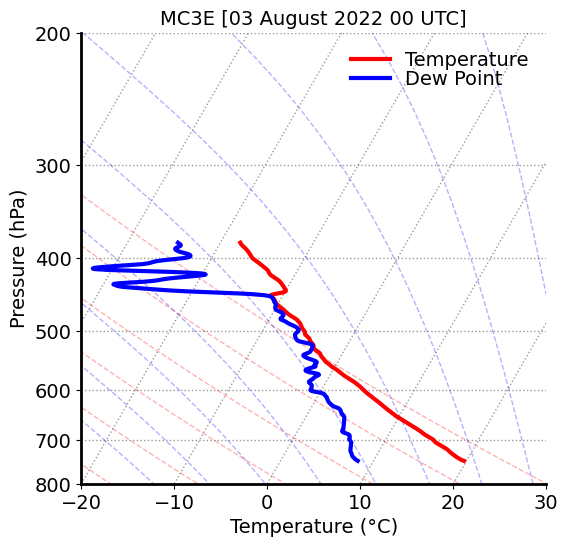

In [57]:

ds_sonde = xr.open_dataset('/work/bb1163/b382718/output/dcmex/observations/aircraft_data/20220802/faam-dropsonde_faam_20220802155302_r0_c310_proc.nc');

pres_sonde = ds_sonde.pres.values
tdry_sonde = ds_sonde.tdry.values
tdew_sonde = ds_sonde.dp.values
rh_sonde   = ds_sonde.rh.values
th_e_sonde = ds_sonde.theta_e.values
th_v_sonde = ds_sonde.theta_v.values
qv_sonde = ds_sonde.mr.values
ht_sonde = ds_sonde.alt.values

valid_indices = ~np.isnan(tdry_sonde) & ~np.isnan(ht_sonde) & ~np.isnan(qv_sonde) & ~np.isnan(rh_sonde) & ~np.isnan(tdew_sonde) & ~np.isnan(pres_sonde)

# Filter the data to remove NaN values
pres_sonde = pres_sonde[valid_indices]
tdry_sonde = tdry_sonde[valid_indices]
tdew_sonde = tdew_sonde[valid_indices]
rh_sonde = rh_sonde[valid_indices]
qv_sonde = qv_sonde[valid_indices]
ht_sonde = ht_sonde[valid_indices]

#qv_sonde = 1.e-3*qv_sonde # g kg-1 to kg kg-1
#----- Calculate parcel properties
e_sat = e_sat_hpa(tdry_sonde)
q_sat = 0.622*e_sat/(pres_sonde-e_sat)
qv_sonde = rh_sonde*q_sat

lcl_pressure, lcl_temp = calculate_lcl(pres_sonde, tdry_sonde, tdew_sonde)
parcel_temp = calc_parcel_temp(pres_sonde, ht_sonde, q_sat, lcl_temp)
Tv_env = calc_vir_temp(tdry_sonde, qv_sonde)
Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
parcel_cape = calc_cape(pres_sonde, tdry_sonde, parcel_temp, Tv_env, Tv_parcel)
print('CAPE :: ',parcel_cape)
#------

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(pres_sonde, tdry_sonde, 'r-', label='Temperature', linewidth=lnwdth)
skew.plot(pres_sonde, tdew_sonde, 'b-', label='Dew Point', linewidth=lnwdth)
#skew.plot(pres_sonde, qv_sonde, 'g-', label='Dew Point', linewidth=lnwdth)
#skew.plot(pres_sonde, parcel_temp, 'g--', label='Parcel', linewidth=lnwdth-1)
# Add wind barbs 
#if 'u' in ds_skewt and 'v' in ds_skewt:
#    u_wind = avg_u  # Zonal wind component
#    v_wind = avg_v  # Meridional wind component
#    skew.plot_barbs(avg_pres, u_wind, v_wind, length=6, color='black')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-20, 30)
ax.set_ylim(800., 200)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('MC3E [03 August 2022 00 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()

In [28]:
print(ds_4sip.time[24])

<xarray.DataArray 'time' ()>
array('2022-08-02T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-08-02T12:00:00
Attributes:
    standard_name:  time
    axis:           T


In [40]:

ds_skewt = ds_4sip.sel(time=ds_4sip.time[25])

print(ds_4sip.time[24])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)
#temp_dew = calc_tdew(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

#----- Calculate parcel properties
e_sat = e_sat_hpa(avg_tempc)
q_sat = 0.622*e_sat/(avg_pres-e_sat)

lcl_pressure, lcl_temp = calculate_lcl(avg_pres, avg_tempc, avg_dewtempc)
#lcl_temp = calc_lcl(avg_tempc[0], avg_dewtempc)
parcel_temp = calc_parcel_temp(avg_pres, avg_ht, q_sat, lcl_temp)
Tv_env = calc_vir_temp(avg_tempc, avg_qv)
Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
parcel_cape = calc_cape(avg_pres, avg_tempc, parcel_temp, Tv_env, Tv_parcel)
print('CAPE :: ',parcel_cape)
#------

<xarray.DataArray 'time' ()>
array('2022-08-02T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-08-02T12:00:00
Attributes:
    standard_name:  time
    axis:           T
CAPE ::  1009.8172954037071


CAPE ::  1021.1269912698493


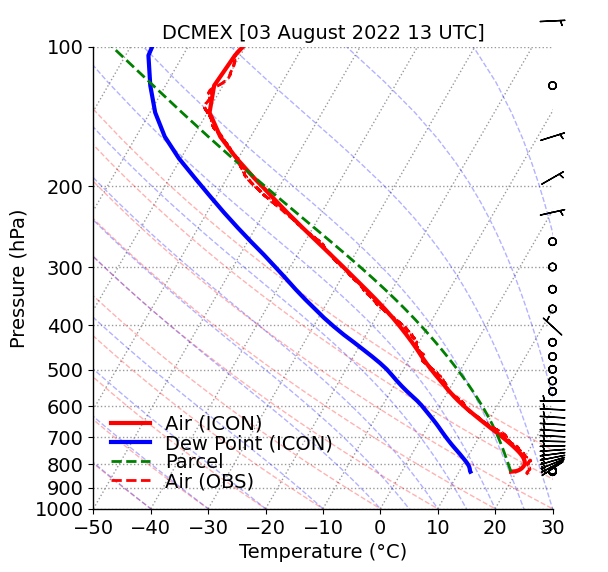

In [61]:

file_path = '/work/bk1415/b382718/output/dcmex/observations/wyoming_sonde/sonde_dcmex_20220802_1200UTC'
column_names = ['pres', 'height', 'temp', 'Tdew', 'relhum', 'qv', 'w_dir', 'w_wind', 'theta', 'theta_e', 'theta_v']


# Specify invalid values (strings or other markers for missing data)
invalid_values = ['-----------------------------------------------------------------------------', '9999.0', '999.0']

# Read the data and replace invalid values with NaN
ds_sonde = pd.read_csv(file_path, sep='\s+', skiprows=6, names=column_names, na_values=invalid_values)

ds_sonde.dropna(inplace=True)

temp_sonde = ds_sonde.temp.values
pres_sonde = ds_sonde.pres.values
tdew_sonde = ds_sonde.Tdew.values
rh_sonde = ds_sonde.relhum.values
qv_sonde = ds_sonde.qv.values
w_sonde = ds_sonde.w_wind.values
ht_sonde = ds_sonde.height.values

print('CAPE :: ', parcel_cape)
#----- Calculate parcel properties
#e_sat = e_sat_hpa(temp_sonde)
#q_sat = 0.622*e_sat/(pres_sonde-e_sat)
#qv_sonde = rh_sonde*q_sat

#lcl_pressure, lcl_temp = calculate_lcl(pres_sonde, temp_sonde, tdew_sonde)
#parcel_temp = calc_parcel_temp(pres_sonde, ht_sonde, q_sat, lcl_temp)
#Tv_env = calc_vir_temp(tdry_sonde, qv_sonde)
#Tv_parcel = calc_vir_temp(parcel_temp, q_sat)
#parcel_cape = calc_cape(pres_sonde, temp_sonde, parcel_temp, Tv_env, Tv_parcel)
#print('CAPE :: ',parcel_cape)
#------

# Create the Skew-T plot
fontsize=14;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(8, 6))
skew = SkewT(fig)

skew.plot(avg_pres, avg_tempc, 'r-', label='Air (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, parcel_temp, 'g--', label='Parcel', linewidth=lnwdth-1)
skew.plot(pres_sonde* units.hPa, temp_sonde* units.degC, 'r--', label='Air (OBS)', linewidth=lnwdth-1)
#skew.plot(pres_sonde* units.hPa, tdew_sonde* units.degC, 'b--', label='Dew Point (OBS)', linewidth=lnwdth)

# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 30)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('DCMEX [03 August 2022 13 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


<xarray.DataArray 'time' ()>
array('2022-08-02T01:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-08-02T01:30:00
Attributes:
    standard_name:  time
    axis:           T
CAPE ::  911.3732143349214 joule / kilogram
CIN ::  -122.6490666082104 joule / kilogram


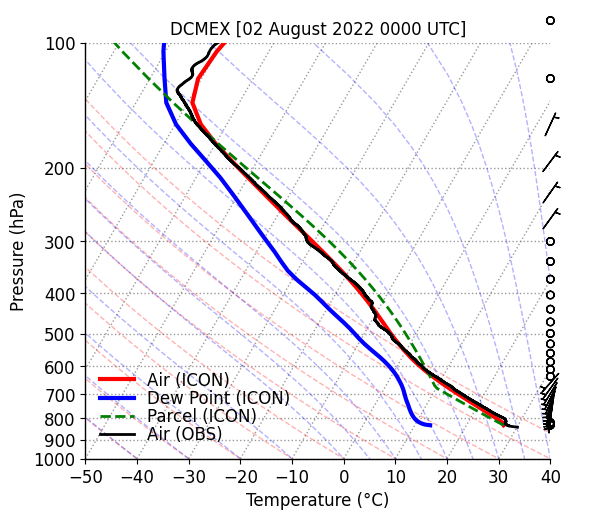

In [78]:
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from metpy.calc import parcel_profile
from metpy.calc import cape_cin



### Obs
file_path = '/work/bk1415/b382718/output/dcmex/observations/wyoming_sonde/sonde_dcmex_20220802_0000UTC'
column_names = ['pres', 'height', 'temp', 'Tdew', 'relhum', 'qv', 'w_dir', 'w_wind', 'theta', 'theta_e', 'theta_v']


# Specify invalid values (strings or other markers for missing data)
invalid_values = ['-----------------------------------------------------------------------------', '9999.0', '999.0']

# Read the data and replace invalid values with NaN
ds_sonde = pd.read_csv(file_path, sep='\s+', skiprows=6, names=column_names, na_values=invalid_values)

ds_sonde.dropna(inplace=True)

temp_sonde = ds_sonde.temp.values
pres_sonde = ds_sonde.pres.values
tdew_sonde = ds_sonde.Tdew.values
rh_sonde = ds_sonde.relhum.values
qv_sonde = ds_sonde.qv.values
w_sonde = ds_sonde.w_wind.values
ht_sonde = ds_sonde.height.values
### end obs

### ICON
ds_skewt = ds_4sip.sel(time=ds_4sip.time[3])

print(ds_4sip.time[3])

tempc = ds_skewt.temp-273.15 #.values
pres_pa = ds_skewt.pres #.values
ht_m = ds_skewt.z_mc
rel_hum = ds_skewt.rh #.values
u_wind = ds_skewt.u
v_wind = ds_skewt.v
q_vap = ds_skewt.qv

   
temp_dew = calc_dewpoint(tempc, rel_hum)

avg_tempc = tempc.mean(dim=('ncells')).values
avg_dewtempc = temp_dew.mean(dim=('ncells')).values
avg_pres = 0.01*pres_pa.mean(dim=('ncells')).values
avg_ht = ht_m.mean(dim=('ncells')).values
avg_rh = rel_hum.mean(dim=('ncells')).values
avg_qv = q_vap.mean(dim=('ncells')).values

avg_u = u_wind.mean(dim=('ncells')).values
avg_v = v_wind.mean(dim=('ncells')).values

avg_tempc = avg_tempc[::-1]
avg_dewtempc = avg_dewtempc[::-1]
avg_pres = avg_pres[::-1]
avg_ht = avg_ht[::-1]
avg_rh = avg_rh[::-1]
avg_u = avg_u[::-1]
avg_v = avg_v[::-1]
avg_qv = avg_qv[::-1]

### Parcel properties from ICON
temperature_K = (avg_tempc + 273.15) * units.K
relative_humidity = avg_rh / 100.0  # Convert to fraction

dewpoint = dewpoint_from_relative_humidity(temperature_K, relative_humidity)
avg_dewtempc = dewpoint.magnitude #- 273.15

pressure = avg_pres * units.hPa
temperature = avg_tempc * units.degC
dewpoint = avg_dewtempc * units.degC

parcel_tempk = parcel_profile(pressure, temperature[0], dewpoint[0])  # First level
parcel_tempc = parcel_tempk.magnitude-273.15

parcel_tempc = parcel_tempc * units.degC
cape, cin = cape_cin(pressure, temperature, dewpoint, parcel_tempc)

print('CAPE :: ', cape)
print('CIN :: ', cin)
### End parcel properties
### End ICON

# Create the Skew-T plot
fontsize=12;
lnwdth=3;
alpha=0.3;

fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig)

# Plot temperature and dew point on the Skew-T
skew.plot(avg_pres, avg_tempc, 'r-', label='Air (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, avg_dewtempc, 'b-', label='Dew Point (ICON)', linewidth=lnwdth)
skew.plot(avg_pres, parcel_tempc, 'g--', label='Parcel (ICON)', linewidth=lnwdth-1)
skew.plot(pres_sonde* units.hPa, temp_sonde* units.degC, 'k-', label='Air (OBS)', linewidth=lnwdth-1)

# Add wind barbs 
if 'u' in ds_skewt and 'v' in ds_skewt:
    u_wind = avg_u  # Zonal wind component
    v_wind = avg_v  # Meridional wind component
    skew.plot_barbs(avg_pres[::2], u_wind[::2], v_wind[::2], length=6, color='black', pivot='middle')

# Add the dry and moist adiabats to the plot
skew.plot_dry_adiabats(linewidth=1, alpha=alpha)
skew.plot_moist_adiabats(linewidth=1, alpha=alpha)

ax = skew.ax
ax.set_xlabel('Temperature (°C)', fontsize=fontsize)
ax.set_ylabel('Pressure (hPa)', fontsize=fontsize)
ax.set_xlim(-50, 40)
ax.set_ylim(1000., 100)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.title('DCMEX [02 August 2022 0000 UTC]', fontsize=fontsize)

plt.legend(frameon=False, handlelength=2, labelspacing=0.01, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', linewidth=1., color='grey', alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


In [48]:


ds_sr = xr.open_mfdataset('/work/bk1415/b382718/output/dcmex/observations/radar_sr1/DCMEX/SR1/data/20220802/cfrad.20220802*RHI.nc')



/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [52]:
ds_sr


<xarray.Dataset>
Dimensions:                           (time: 2502, frequency: 1, sweep: 1,
                                       r_calib: 1, range: 1001)
Coordinates:
  * frequency                         (frequency) float32 5.593e+09
  * time                              (time) datetime64[ns] 2022-08-02T19:13:...
  * range                             (range) float32 0.0 150.0 ... 1.5e+05
Dimensions without coordinates: sweep, r_calib
Data variables: (12/135)
    volume_number                     (time) float64 4.0 4.0 4.0 ... 17.0 17.0
    platform_type                     (time) |S32 b'fixed' b'fixed' ... b'fixed'
    primary_axis                      (time) |S32 b'axis_z' ... b'axis_z'
    status_xml                        (time) |S1 b'' b'' b'' b'' ... b'' b'' b''
    instrument_type                   (time) |S32 b'radar' b'radar' ... b'radar'
    radar_antenna_gain_h              (time) float64 nan nan nan ... nan nan nan
    ...                                ...
    ZDR                               (time, range) float32 dask.array<chunksize=(40, 1001), meta=np.ndarray>
    KDP                               (time, range) float32 dask.array<chunksize=(40, 1001), meta=np.ndarray>
    PHIDP                             (time, range) float32 dask.array<chunksize=(40, 1001), meta=np.ndarray>
    SQI                               (time, range) float32 dask.array<chunksize=(40, 1001), meta=np.ndarray>
    RHOHV                             (time, range) float32 dask.array<chunksize=(40, 1001), meta=np.ndarray>
    DBZV                              (time, range) float32 dask.array<chunksize=(40, 1001), meta=np.ndarray>
Attributes: (12/25)
    Conventions:          CF-1.7
    Sub_conventions:      CF-Radial instrument_parameters radar_parameters ra...
    version:              CF-Radial-1.4
    title:                RHI_DCM
    institution:          
    references:           Conversi
    ...                   ...
    site_name:            SR1
    scan_name:            
    scan_id:              0
    platform_is_mobile:   false
    n_gates_vary:         false
    ray_times_increase:   true

In [45]:
print(ds_sr.pressure_altitude_correction.max().values)

0.0


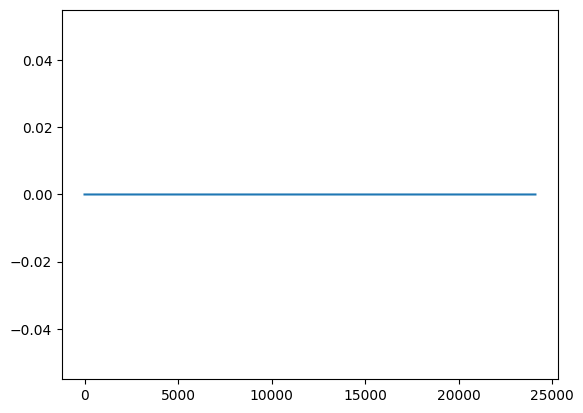

In [43]:
plt.plot(ds_sr.pressure_altitude_correction)

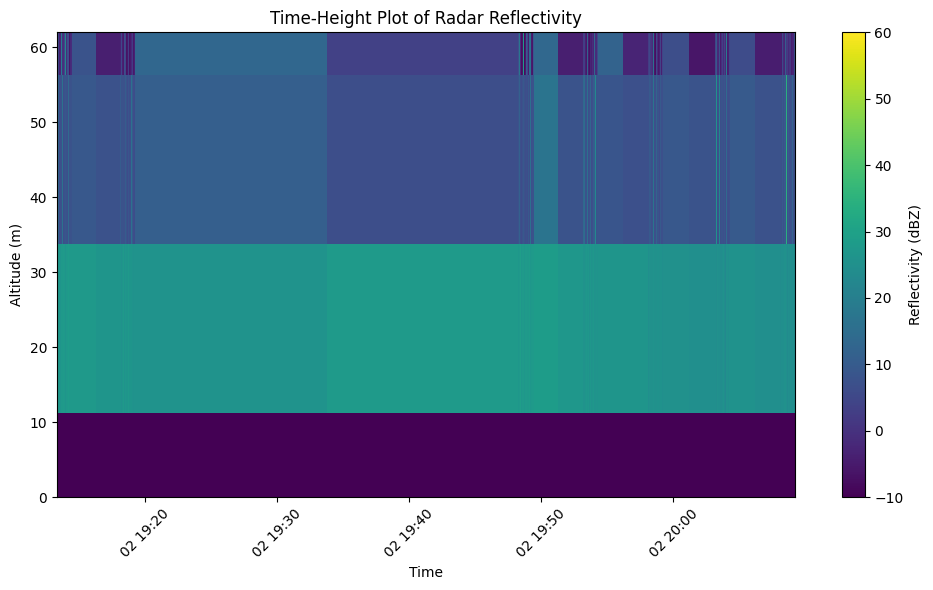

In [53]:


time = ds_sr['time']
altitude = 1.e-3*150.*ds_sr['range'] # range resolution for SMART (SR1) radar is 150 m Finney et al. (2024, Table 2)
dbz = ds_sr['DBZV']
lon = ds_sr['longitude']
lat = ds_sr['latitude']


# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(time, altitude, dbz.T, shading='auto', cmap='viridis', vmin=-10, vmax=60)

# Add colorbar
cbar = plt.colorbar(label='Reflectivity (dBZ)')

plt.ylim(0, 62.)
# Labels and title
plt.xlabel('Time')
plt.ylabel('Altitude (m)')
plt.title('Time-Height Plot of Radar Reflectivity')

# Format x-axis for better time representation
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()